# Import

In [ ]:
# basic import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

In [ ]:
# # data visualization
# import seaborn as sns
# import matplotlib.colors as mat_colors
# from mpl_toolkits.mplot3d import Axes3D
# from autoviz.AutoViz_Class import AutoViz_Class
# from IPython.display import SVG

In [ ]:
import spacy
import re

In [ ]:
link_train = LINK
link_test = LINK

In [ ]:
train_df = pd.read_csv(link_train, delimiter=",")
test_df = pd.read_csv(link_test, delimiter=";")

In [ ]:
train_df['text'] = train_df['stemmed_text']
train_df.drop(columns=['label_angka', 'stemmed_text', 'Unnamed: 0'], inplace=True)
train_df

,text,label
0,kunjung prabowo untuk resmi serah proyek bantu...,Sumber Daya Alam
1,anies tepuk tangan riah jadi rektor wajib mata...,Politik
2,emng bener sih dukung anies juga dukung prabow...,Demografi
3,waktu anies sikap kritis kerja pak prabowo ang...,Politik
4,anies baswedan harap asn masuk tni polri pegan...,Politik
...,...,...
4578,ngeliat debat kemaren pas prabowo kicep kira k...,Politik
4579,masyarakat yakin prabowo gibran milik visi jal...,Politik
4580,imo both are irrational but satu jauh lebih ir...,Ekonomi
4581,look at that pak ganjar sudah kecimpung lgisla...,Pertahanan dan Keamanan


In [ ]:
train_df.to_csv('text_1.csv')

# Overview

In [ ]:
train_df

,text,label
0,kunjung prabowo untuk resmi serah proyek bantu...,Sumber Daya Alam
1,anies tepuk tangan riah jadi rektor wajib mata...,Politik
2,emng bener sih dukung anies juga dukung prabow...,Demografi
3,waktu anies sikap kritis kerja pak prabowo ang...,Politik
4,anies baswedan harap asn masuk tni polri pegan...,Politik
...,...,...
4578,ngeliat debat kemaren pas prabowo kicep kira k...,Politik
4579,masyarakat yakin prabowo gibran milik visi jal...,Politik
4580,imo both are irrational but satu jauh lebih ir...,Ekonomi
4581,look at that pak ganjar sudah kecimpung lgisla...,Pertahanan dan Keamanan


In [ ]:
test_df

,IDText,Text
0,TXT0001,Lu mau org2 pro-demokrasi di negara ini bisa p...
1,TXT0002,Prabowo ditanya soal hutang luar negeri dia me...
2,TXT0003,kiki_daliyo Ganjar Pranowo itulah beliau soso...
3,TXT0004,@kumparan Prabowo Gibran yang bisa melakukan i...
4,TXT0005,@sniperruben45 @uda_zulhendra @ainunnajib Lah ...
...,...,...
995,TXT0996,"Bikin bangga deh, Ganjar-Mahfud mau alokasikan..."
996,TXT0997,Pak Jokowi sebelum pilpres 2024 berbesar hati ...
997,TXT0998,@datuakrajoangek Sbaiknya si gemot nga usah ik...
998,TXT0999,kebiasaan merembuk atau bermusyawarah jadi gay...


In [ ]:
print(train_df.shape)
print(test_df.shape)

(4583, 2)
(1000, 2)


In [ ]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4583 entries, 0 to 4582
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    4583 non-null   object
 1   label   4583 non-null   object
dtypes: object(2)
memory usage: 71.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   IDText  1000 non-null   object
 1   Text    1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [ ]:
train_df.describe()

,text,label
count,4583,4583
unique,4271,8
top,bulan januari serang kubu dkk makin sengit mas...,Politik
freq,33,2952


In [ ]:
test_df.describe()

,IDText,Text
count,1000,1000
unique,1000,1000
top,TXT0001,Lu mau org2 pro-demokrasi di negara ini bisa p...
freq,1,1


In [ ]:
train_df.isna().sum()

text     0
label    0
dtype: int64

In [ ]:
train_df.duplicated().sum()

286

In [ ]:
test_df.duplicated().sum()

0

In [ ]:
train_df[train_df.duplicated()]

,text,label
59,waktu anies sikap kritis kerja pak prabowo ang...,Politik
126,bulan januari serang kubu dkk makin sengit mas...,Pertahanan dan Keamanan
141,bulan januari serang kubu dkk makin sengit mas...,Pertahanan dan Keamanan
147,bulan januari serang kubu dkk makin sengit mas...,Pertahanan dan Keamanan
148,capres cawapres ganjar pranowo mahfud md ajak ...,Ideologi
...,...,...
4520,netizen geger haikal hassan guna politik ident...,Politik
4522,cukup lihat track recordnya ganjar pranowo mah...,Politik
4544,bukan cuma tampil luar bijak ganjar pranowo ma...,Ideologi
4574,bulan januari serang kubu dkk makin sengit mas...,Pertahanan dan Keamanan


In [ ]:
all_duplicated_texts = train_df[train_df['text'].duplicated(keep=False)]

print("\nDetailed comparison of duplicated text entries:")
grouped = all_duplicated_texts.groupby('text')
for name, group in grouped:
    print(f"\nText: {name}")
    print(group)


Detailed comparison of duplicated text entries:

Text: 07 100 food estate mulai canang 3 tahun lalu tepat 6 juli 2020 bantu menteri pupr menteri tani garis besar food estate program ekstensifikasi tani buka lahan besar ubah jadi lahan tani 2 bulan canang food estate mulai kerja kalimantan tengah daerah gunung emas pt libat program dasar telusur tempo pt baru bentuk 5 bulan belum pt agrinas susun direksi dapat 3 gerindra banyak staff agrinas rangkap pegawai menteri tahan food estate food estate rencana buka 6 ribu hektar hutan hujan tropis tepat 4 bulan canang beberapa anggota tni libat babat hutan hutan buka 670 hektar itu adalah hutan tentu banyak kayu hasil mana kayu2 sebut tiada tahu tiada erti awal food estate tanam singkong bekas hutan sebut tanah pasir singkong tak kunjung tumbuh kurun waktu 3 tahun tutup gagal sebut datang jagung polibag 34 hektare lahan sebut itu hasil muas sisi anggar food estate masuk kategori pesan anggar habis 20212022 15 triliun 2023 anggar 24 triliun nan

In [ ]:
train_df.nunique()

text     4271
label       8
dtype: int64

In [ ]:
train_df['label'].value_counts()

label
Politik                    2952
Sosial Budaya               419
Ideologi                    339
Pertahanan dan Keamanan     330
Ekonomi                     309
Sumber Daya Alam            154
Demografi                    60
Geografi                     20
Name: count, dtype: int64

# TO DO LIST Preprocessing

## Word Preprocess

In [ ]:
from collections import Counter

In [ ]:
def counter_word(df, num):
  counter = df['text'].apply(lambda x:str(x).split())
  top = Counter([item for sublist in counter for item in sublist])
  temp = pd.DataFrame(top.most_common(num))
  temp.columns = ['Common_words','count']
  return temp.style.background_gradient(cmap='Blues')

def counter_word2(df, num, n):
  counter = df['text'].apply(lambda x:str(x).split())
  top = Counter([item for sublist in counter for item in sublist if len(item) > n])
  temp = pd.DataFrame(top.most_common(num))
  temp.columns = ['Common_words','count']
  return temp.style.background_gradient(cmap='Blues')

In [ ]:
counter_word2(process_df, 200, 11)

,Common_words,count
0,elektabilitas,61
1,internasional,37
2,alhamdulillah,37
3,infrastruktur,18
4,transportasi,16
5,purnawirawan,12
6,diskriminasi,11
7,transparansi,6
8,implementasi,5
9,nasionalisme,5


In [ ]:
counter_word2(process_df, 100, 15)

,Common_words,count
0,menjelekjelekkan,1
1,inkonstitusional,1
2,fikiranampmoralyuk,1
3,ideaspropositions,1
4,didiskuslifikasi,1
5,mensejahterahkan,1
6,kelompokorganisasi,1
7,diskualisifikasi,1


In [ ]:
process_df['text'] = process_df['text'].str.replace(r'\b\w{20,}\b', '', regex=True)

In [ ]:
dictionary_test = {
    'pemerintahanganjarmahfud': 'pimpinan ganjar mahfud',
    'gerindragolkarpkbpkspan': 'gerindra golkar pkb pks pan',
    'pelanggaranpelanggaran':'pelanggaran',
    'intoleranterbantahkan': 'intoleran terbantahkan',
    'keterbatasanketerbatasan': 'keterbatasan',
    'semangatganjarmahfud':'semangat ganjar mahfud',
    'pencapaianpencapaian':'pencapaian pencapaian',
    'pertahanankeamanan':'pertahanan keamanan',
    'pembangunanjnk18e1':'pembangunan',
    'santriwansantriwati':'santriwan santriwati',
    'menyebututangyang':'menyebut utang yang',
    'kinerjakinerjanya':'kinerja kinerjanya',
    'ditolakorgpapuadll':'ditolak orang papua',
    'korupsidiindonesia':'korupsi indonesia',
    'setengah2mentang2':'setengah mentang',
    'pamulangcinereraya':'pamulang cinere raya',
    'ganjarm3nangd3bat':'ganjar menang debat',
    'kebijakankebijakan':'kebijakan',
    'bersungguhsungguh':'bersungguh sungguh',
    'kinerjakinerjanya':'kinerja kinerjanya',
    'prajuritbhayangkara':'prajurit bhayangkara',
    'indikatorindikator':'indikator',
    'berbondongbondong':'berbondong bondong',
    'terkencingkencing':'terkencing kencing',
    'kesewenangwenangan':'kesewenang wenangan',
    'pertanggungjawaban':'pertanggung jawaban',
    'ganjarpranowo':'ganjar pranowo',
    'mohmahfudmd':'mahfud md',
    'aniesbaswedan':'anies baswedan',
    'indonesiajn18a':'indonesia',
    'undang-undang':'undang undang',
    'dukungantulus':'dukungan tulus',
    'prabowogibran02':'prabowo gibran',
    'gibran_tweet':'',
    'sahabatganjar':'sahabat ganjar',
    'menangkanganjar':'menangkan ganjar',
    'masbowogbran':'bapak prabowo gibran',
    'baikpakbowo':'baik bapak prabowo',
    'aniesmuhaimin':'anies muhaimin',
    'ardiningrum22':'',
    'nelayansejahtera':'nelayan sejahtera',
    'ajengcute16__':'',
    'oposisicerdas':'oposisi cerdas',
    'melihat_indo':'melihat indo',
    'ajengcute16__':'',
    'partaisocmed':'',
    'txtdrpemerintah':'',
    'kikysaputrii':'',
    'jokowiprabowo':'jokowi prabowo',
    'cnnindonesia':'cnn indonesia',
    'fahrihamzah':'',
    'ubanbukanpakde':'uban bukan bapak',
    'kiki_daliyo':'',
    'besarbesaran':'besar besaran',
    'satusatunya':'satu satunya',
    'teman-teman':'teman teman',
    'resty_j_cayah':'',
    'mohmahfudmd':'mahfud md',
    'alextham878':'',
    'janganjangan':'jangan jangan',
    'baswedanmuhaimin':'baswedan muhaimin',
    'caprescawapres':'capres cawapres',
    'cawapresnya':'cawapres',
    'sosokcapresnomor':'sosok capres nomor',
    'mengetahuiganjar':'mengetahui ganjar',
    'tindakantindakan':'tindakan tindakan',
    'jurdilinsyaallah':'jurdil insyaallah',
    'nganggukngangguk':'ngangguk ngangguk',
    'ganjaruntuksemua':'ganjar untuk semua',
    'menimbangnimbang':'menimbang nimbang',
    'responsifjnk18e1':'responsif',
    'komentarkomentar':'komentar komentar',
    'pendukungrelawan':'pendukung relawan',
    'twiterantiktokan':'twitter anti tiktok',
    'kegiatankegiatan':'kegiatan kegiatan',
    'psiprabowogibran':'psi prabowo gibran',
    'dihalanghalangi':'halang halangi',
    'generasi_mudanu':'generasi muda nu',
    'sebelumnyajn18a':'sebelumnya',
    'partburunggalak':'',
    'wahhabicc_jabar':'',
    'maruahalsiahaa2':'',
    'djojohadikusumo':'',
    'agusudarmansyah':'',
    'berhadaphadapan':'berhadap hadapan',
    'davidgoliath999':'',
    'asomaso_1234567':'',
    'chaoticbarbari1':'',
    'rakyatnyaganjar':'rakyat ganjar',
    'txtdrnaktengah_':'',
    'lachimo73679685':'',
    'thangichothape1':'',
    'akubolehjujurga':'',
    'indonesiaisrael':'',
    'sabar_setiabudi':'',
    'cintaindonesiad':'',
    'bergejolaknamun':'',
    'simanjuntakelly':'',
    'alfaridzys37366':'',
    'andikadanangpr1':'',
    'budimandjatmiko':'',
    'yustiawanihsan2':'',
    'konohatami28877':'',
    'budi83236750515':'',
    'lisaamartatara6':'',
    'bisnisbisnisnya':'bisnis bisnis',
    'undangundangnya':'undang undang',
    'helicopternyadi':'',
    'dialektika_post':'',
    'kamandanungapak':'',
    'retstart1256113':'',
    'rachlannashidik':'',
    'ward_berenschot':'',
    'dibukauntukumum':'',
    'a0anisfauzan1a0':'',
    'pedagang_kritik':'',
    'zulkiflilubis69':'',
    'zulkiflilubis69':'',
    'claudia97079166': '',
    'agussayful12582':'',
    '124hmahhastuti1':'',
    'putry_nusantara':'',
    'memelord_666666':'',
    'datuakrajoangek':'',
    'kimberley_2024':'',
    'terangterangan':'terang terangan',
    'terbahak-bahak':'terbahak bahak',
    'pranowomembawa':'pranowo membawa',
    'herisapto86131':'',
    'ketidakadilan2':'ketidakadilan',
    'ejaferdiansyah':'',
    'baswedanmereka':'baswedan mereka',
    'doyantidurxixi':'',
    'keluhankeluhan':'keluhan keluhan',
    'selatanselatan':'selatan selatan',
    'mentalhealthy8':'',
    'mentalhealthy8':'',
    'ngomongngomong':'omong omong',
    'korupsimalahan':'korupsi malahan',
    'dimintameminta':'diminta minta',
    'jugakomunikasi':'juga komunikasi',
    'haepyeverafter':'',
    'prabowoseperti':'prabowo seperti',
    'ketikadiserang':'ketika diserang',
    'praktikpraktik':'praktik praktik',
    'neohistoria_id':'',
    'subiantogibran':'subianto gibran',
    'blunderblunder':'ceroboh ceroboh',
    'edwardaspinall':'',
    'mdy_asmara1701':'',
    'mentrigubernur':'mentri gubernur',
    'beritajatimcom':'',
    'pilkadapilpres':'pilkada pilpres',
    'pdi_perjuangan':'',
    'smithbraginski':'',
    'thanmustbagoes':'',
    'bengkakbengkak':'bengkak bengkak',
    'sahabatalaqsha':'',
    'pesonaciherang':'',
    'kemasankemasan':'kemasan kemasan',
    'dunianyasantai':'',
    'semenclamencle':'',
    'djoker_ginongs':'',
    'renandabachtar':'',
    'menyesatkantak':'menyesatkan',
    'narasinewsroom':'',
    'situasisituasi':'situasi situasi',
    'birupastel0109':'',
    'choymarkochoy':'',
    'pranowomahfud':'pranowo mahfud',
    'rustriningsih':'',
    'prabowojokowi':'prabowo jokowi',
    'halanghalangi':'halang halangi',
    'sniperruben45':'',
    'uda_zulhendra':'',
    'bertahuntahun':'bertahun tahun',
    'netizengansta':'',
    'soekarnoputri':'',
    'namasayamelki':'',
    'burhanmuhtadi':'',
    'bevmymistakes':'',
    '408suhbrastha':'',
    'pertimbanganpertimbangan':'pertimbangan pertimbangan',
    'shazilarafiah':'',
    'bobbypoerwana':'',
    'millenialsgen':'',
    'ngapusimboten':'hapus imboten',
    'sebaliknyajgn':'sebaliknya jangan',
    'rocky_antonie':'',
    'bukanakdajjal':'',
    'agungkharismm':'',
    'deliverygurll':'',
    'publikasi_kan':'',
    'asmaulbinmaul':'',
    'ramdhanistwn_':'',
    'agusyudhoyono':'',
    'rasya66142734':'',
    'yumekmistr0ng':'',
    'bastianbas18_':'',
    'pbshop9566992':'',
    'penyuka_ombak':'',
    'denismalhotra':'',
    'berturutturut':'berturut turut',
    'pencawapresan':'cawapres',
    'kamiadadisini':'kami ada disini',
    'choco19529526':'',
    'rakyatjnk18e1':'',
    'shikuzakatomo':'',
    'andre_rosiade':'',
    'paraaaaahhhhh':'',
    'faizalassegaf':'',
    'makindiserang':'makin diserang',
    'kronikroninya':'kroni kroninya',
    'bacot58913409':'',
    'ernestprakasa':'',
    'bermanismanis':'bermanis manis',
    'geiszchalifah':'',
    'muhadklyacho':'',
    'daerahdaerah':'daerah daerah',
    'berulangkali':'berulang kali',
    'cheryltanzil':'',
    'masingmasing':'masing masing',
    'terusterusan':'terus terusan',
    'restty_cayah':'',
    'prodemokrasi':'pro demokrasi',
    'debatprabowo':'debat prabowo',
    'undangundang':'undang-undang',
    'sikatkorupsi':'sikat korupsi',
    'diyonmandiri':'',
    'temanteman':'teman teman',
    'karenahati':'karena hati',
    'benarbenar':'benar benar',
    'aamiin':'amiin',
    'rekan2':'rekan',
}

In [ ]:
def preprocess_test1(text):
    if pd.isna(text):
        return text
    # Konversi ke huruf kecil
    text = text.lower()

    # Memperbaiki ejaan
    words = text.split()
    corrected_words = []
    for word in words:
        corrected_word = dictionary_test.get(word, word)
        corrected_words.append(corrected_word)

    # Menggabungkan kembali menjadi teks yang telah diproses
    cleaned_text = ' '.join(corrected_words)
    return cleaned_text

def preprocess_dataframe_test1(df, text_column):
    df[text_column] = df[text_column].apply(preprocess_test1)
    return df

# Memproses DataFrame
process_df = preprocess_dataframe_test1(process_df, 'text')

print("Cleaned DataFrame:")
print(process_df)

Cleaned DataFrame:
                                                   text  \
0     kunjung prabowo untuk resmi serah proyek bantu...   
1     anies tepuk tangan riah jadi rektor wajib mata...   
2     emng bener sih dukung anies juga dukung prabow...   
3     waktu anies sikap kritis kerja pak prabowo ang...   
4     anies baswedan harap asn masuk tni polri pegan...   
...                                                 ...   
4578  ngeliat debat kemaren pas prabowo kicep kira k...   
4579  masyarakat yakin prabowo gibran milik visi jal...   
4580  imo both are irrational but satu jauh lebih ir...   
4581  look at that pak ganjar sudah kecimpung lgisla...   
4582  acara tidak masak calon presiden nomor urut 2 ...   

                        label  
0            Sumber Daya Alam  
1                     Politik  
2                   Demografi  
3                     Politik  
4                     Politik  
...                       ...  
4578                  Politik  
4579            

In [ ]:
dicts = {
    'ganjarmahfud2024': 'ganjar mahfud',
    'lanjutgansemuakerja':'lanjutkan semua kerja',
    'tembakaudukungan':'tembakau dukungan',
    'baswedanmuhaimin':'baswedan muhaimin',
    'titipkankerukunan':'titipkan kerukunan',
    'investorfriendly':'ramah investor',
    'kesewenangwenangan':'kesewenang wenangan',
    'menimbangnimbang':'menimbang nimbang',
    'ketidakpercayaan':'tidak percaya',
    'ganjarsikatkorupsi':'ganjar sikat korupsi',
    'ganjarmahfud':'ganjar mahfud',
    'aniesmuhaimin':'anies muhaimin',
    'bersamasama':'bersama sama',
    'programprogram':'program program',
    'berbuatbaik':'berbuat baik',
    'untukmasyarakat':'untuk masyarakat',
    'untukindonesia':'untuk indonesia',
    'untukpragibs':'untuk prabowo gibran',
    'kitaselaluada':'kita selalu ada',
    'pranowomahfud':'pranowo mahfud',
    'dukungantulus':'dukungan tulus',
    'caprescawapres':'capres cawapres',
    'rakyatsenang':'rakyat senang',
    'undang-undang':'undang undang',
    'mdmahfudrebound':'mahfud md rebound',
    'pilihankita':'pilihan kita',
    'ketidakadilan':'tidak adil',
    'aniesganjar':'anies ganjar',
    'langkahlangkah':'langkah langkah',
    'anakanaknya':'anak anaknya',
    'prinsipprinsip':'prinsip prinsip',
    'terusmenerus':'terus menerus',
    'negaranegara':'',
    'utkindonesia':'untuk indonesia',
    'pemudaseperti':'pemuda seperti',
    'sukarnohatta':'sukarno hatta',
    'sertifikattanah':'sertifikat tanah',
    'untukrakyat':'untuk rakyat',
    'nyataseperti':'nyata seperti',
    'milihtulusnya':'pilih tulusnya',
    'hatipakbowo':'hati bapak prabowo',
    'ayahbowogbran':'bapak prabowo gibran',
    'palingsejuk':'paling sejuk',
    'memastikanditps':'memastikan di tps',
    'hektareatau':'hektare atau',
    'kitamasbowo':'kita bapak prabowo',
    'pakbowomasgib':'bapak prabowo gibran',
    'yangterbaik':'yang terbaik',
    'p3mbangunan':'pembangunan',
    'ter0risbaasyir':'teroris abu baasyir',
    'paslonpaslon':'paslon paslon',
    'milihpakbowo':'pilih bapak prabowo',
    'aniesmuhaimins':'anies muhaimin',
    'sahabatsantri':'sahabat santri',
    'nelayanpetani':'nelayan petani',
    'kitapakb0w0':'kita bapak prabowo',
    'produkproduk':'produk produk',
    'straightforward':'mudah',
    'barengbareng':'bareng bareng',
    'menterimenteri':'menteri menteri',
    'menggarisbawahi':'garis bawah',
    'takterbendung':'tidak terbendung',
    'tembakaudukung':'tembakau dukung',
    'k3sejaht3raan':'kesejahteraan',
    'penerimaharapan':'terima harapan',
    'kesalahpahaman':'salah paham',
    'lanjutgansemuamurah':'lanjut ganjar semua murah',
    'aniesbubble':'anies bubble',
    'pastiinpbowo':'pasti prabowo',
    'sampaisampai':'sampai sampai',
    'berkalikali':'kali kali',
    'menyalahgunakan':'salah guna',
    'berkatakata':'kata kata',
    'penyalahgunaan':'salah guna',
    'kalengkaleng':'luar nalar',
    'dosadosanya':'dosa dosa',
    'prabowigibran':'prabowo gibran',
    'alhamdulilah':'alhamdulillah',
    'ketidaksetaraan':"tidak setara",
    'konkretseperti':'konkret seperti',
    'erasigotongroyong':'erasi gotong royong',
    'menangprabowogibran':'menang prabowo gibran',
    'sendiribismillah':'sendiri bismillah',
    'masalahnyaseperti':'masalah seperti',
    'presidentsampaikan':'presiden sampai',
    'nyataganjarmahfud':'nyata ganjar mahfud',
    'pak':'bapak',
    'bapa':'bapak',
    'tak':'tidak',
    'bpk':'bapak'
}

In [ ]:
process_df[process_df['text'].str.contains(' tak ', case=False)]

,text,label
8,bapak bapa bapa ikan perhati didik anak anak p...,Politik
19,siti atikoh unjung kantor tpd ganjarmahfud sum...,Politik
85,momen capres nomor urut 3 ganjar pranowo besuk...,Pertahanan dan Keamanan
132,kapitalisme neoliberal tak cocok indonesia kat...,Ideologi
144,medan bung anak medan rantau jakarta pulang ru...,Politik
...,...,...
4401,diksi motor brong mabuk ciu punya sim provokas...,Politik
4414,fokus lihat pakai peci putih jas warna hijau b...,Politik
4424,kata pepatah buah jatuh tak jauh pohon alam ga...,Sosial Budaya
4436,omonomon data rahasia kode sandi gxblxk kemas ...,Politik


In [ ]:
counter_word2(process_df, 100, 15)

,Common_words,count
0,ganjarmahfud2024,8
1,lanjutgansemuakerja,5
2,tembakaudukungan,4
3,titipkankerukunan,4
4,investorfriendly,3
5,ketidakpercayaan,2
6,ganjarsikatkorupsi,2
7,lanjutgansemuamurah,2
8,masalahnyaseperti,2
9,presidentsampaikan,1


In [ ]:
def preprocess_test2(text):
    if pd.isna(text):
        return text
    # Konversi ke huruf kecil
    text = text.lower()

    # Memperbaiki ejaan
    words = text.split()
    corrected_words = []
    for word in words:
        corrected_word = dicts.get(word, word)
        corrected_words.append(corrected_word)

    # Menggabungkan kembali menjadi teks yang telah diproses
    cleaned_text = ' '.join(corrected_words)
    return cleaned_text

def preprocess_dataframe_test2(df, text_column):
    df[text_column] = df[text_column].apply(preprocess_test2)
    return df

# Memproses DataFrame
process_df = preprocess_dataframe_test2(process_df, 'text')

print("Cleaned DataFrame:")
print(process_df)

Cleaned DataFrame:
                                                   text  \
0     kunjung prabowo untuk resmi serah proyek bantu...   
1     anies tepuk tangan riah jadi rektor wajib mata...   
2     emng bener sih dukung anies juga dukung prabow...   
3     waktu anies sikap kritis kerja bapak prabowo a...   
4     anies baswedan harap asn masuk tni polri pegan...   
...                                                 ...   
4578  ngeliat debat kemaren pas prabowo kicep kira k...   
4579  masyarakat yakin prabowo gibran milik visi jal...   
4580  imo both are irrational but satu jauh lebih ir...   
4581  look at that bapak ganjar sudah kecimpung lgis...   
4582  acara tidak masak calon presiden nomor urut 2 ...   

                        label  
0            Sumber Daya Alam  
1                     Politik  
2                   Demografi  
3                     Politik  
4                     Politik  
...                       ...  
4578                  Politik  
4579            

## Stopword stemming

In [ ]:
!pip install Sastrawi

In [ ]:
import pandas as pd
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [ ]:
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()

print(stopwords)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [ ]:
stopwords = factory.create_stop_word_remover()

In [ ]:
process_df['text'] = process_df['text'].apply(stopwords.remove)

In [ ]:
process_df[process_df['text'].str.contains(' bpk ', case=False)]

,text,label


In [ ]:
counter_word(process_df, 100)

,Common_words,count
0,ganjar,2073
1,anies,2027
2,prabowo,1995
3,bapak,1288
4,mahfud,1067
5,pranowo,879
6,jadi,860
7,dukung,734
8,indonesia,681
9,sama,581


## Stemming Sastrawi

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df = process_df.copy()

In [ ]:
def tokenize_text(sentence):
    token = nltk.tokenize.word_tokenize(sentence)
    return token

In [ ]:
df['token'] = df['text'].apply(tokenize_text)
df.head()

,text,label,token
0,kunjung prabowo resmi serah proyek bantu air b...,Sumber Daya Alam,"[kunjung, prabowo, resmi, serah, proyek, bantu..."
1,anies tepuk tangan riah jadi rektor wajib mata...,Politik,"[anies, tepuk, tangan, riah, jadi, rektor, waj..."
2,emang benar sih dukung anies dukung prabowo ha...,Demografi,"[emang, benar, sih, dukung, anies, dukung, pra..."
3,waktu anies sikap kritis kerja bapak prabowo a...,Politik,"[waktu, anies, sikap, kritis, kerja, bapak, pr..."
4,anies baswedan harap asn masuk tni polri pegan...,Politik,"[anies, baswedan, harap, asn, masuk, tni, polr..."


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stem_factory = StemmerFactory()
stemmer = stem_factory.create_stemmer()

In [ ]:
def stemming_text(tokens):
    result = [stemmer.stem(token) for token in tokens]
    return result

In [ ]:
df['stemmed'] = df['token'].apply(stemming_text)

KeyboardInterrupt: 

In [ ]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

In [ ]:
all_tokens =[token for sublist in df['stemmed'] for token in sublist]
freq = FreqDist(all_tokens)
print(freq.most_common())

In [ ]:
df['stemmed_text'] = df['stemmed'].apply(lambda tokens: ' '.join(tokens))
df

In [ ]:
from IPython.display import display, HTML

# Fungsi untuk menghasilkan HTML dengan perbedaan yang disorot
def highlight_diffs(s1, s2):
    styles = ['background-color: yellow' if v else '' for v in (s1 != s2)]
    return pd.DataFrame({'Original': s1, 'New': s2, 'Highlight': styles})

# Menggunakan display dan HTML untuk menunjukkan perbedaan
diff_df = highlight_diffs(df['stemmed_text'], process_df['text'])
styled_df = diff_df.style.apply(lambda x: diff_df['Highlight'], axis=0)
display(styled_df)


In [ ]:
process_df['text'] = df['stemmed_text']

# Modeling

In [ ]:
process_df = pd.read_csv('/content/more_preprocess.csv')
process_df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
# process_df.drop(columns=['stemmed_text', 'encoded_label']).to_csv('test.csv')

## Multinomial NB + TfidVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [ ]:
process_df['stemmed_text'] = process_df['text']
encoding_dict = {
    'Politik':0,
    'Sosial Budaya':1,
    'Pertahanan dan Keamanan':2,
    'Ideologi':3,
    'Ekonomi':4,
    'Sumber Daya Alam':5,
    'Demografi':6,
    'Geografi':7,
}

# Fitting and transforming the 'Category' column
process_df['encoded_label'] = process_df['label'].map(encoding_dict)

In [ ]:
process_df

,text,label,stemmed_text,encoded_label
0,kunjung prabowo resmi serah proyek bantu air b...,Sumber Daya Alam,kunjung prabowo resmi serah proyek bantu air b...,5
1,anies tepuk tangan riah jadi rektor wajib mata...,Politik,anies tepuk tangan riah jadi rektor wajib mata...,0
2,emang benar sih dukung anies dukung prabowo ha...,Demografi,emang benar sih dukung anies dukung prabowo ha...,6
3,waktu anies sikap kritis kerja bapak prabowo a...,Politik,waktu anies sikap kritis kerja bapak prabowo a...,0
4,anies baswedan harap asn masuk tni polri pegan...,Politik,anies baswedan harap asn masuk tni polri pegan...,0
...,...,...,...,...
4282,ngeliat debat kemaren pas prabowo kicep kira k...,Politik,ngeliat debat kemaren pas prabowo kicep kira k...,0
4283,masyarakat yakin prabowo gibran milik visi jal...,Politik,masyarakat yakin prabowo gibran milik visi jal...,0
4284,imo both are irrational but satu jauh lebih ir...,Ekonomi,imo both are irrational but satu jauh lebih ir...,4
4285,look at that bapak ganjar kecimpung lgislatif ...,Pertahanan dan Keamanan,look at that bapak ganjar kecimpung lgislatif ...,2


In [ ]:
# Fitting and transforming the 'Category' column
X_train, X_test, y_train, y_test = train_test_split(
    process_df.stemmed_text,
    process_df.encoded_label,
    test_size=0.2,
    random_state=42,
    stratify=process_df.encoded_label
)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = Pipeline([
    ('vectorizer_tfid',TfidfVectorizer()),
    ('Multi NB',MultinomialNB())
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80       574
           1       0.00      0.00      0.00        80
           2       0.00      0.00      0.00        53
           3       0.00      0.00      0.00        52
           4       0.00      0.00      0.00        55
           5       0.00      0.00      0.00        28
           6       0.00      0.00      0.00        12
           7       0.00      0.00      0.00         4

    accuracy                           0.67       858
   macro avg       0.08      0.12      0.10       858
weighted avg       0.45      0.67      0.54       858



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import classification_report, balanced_accuracy_score

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy: {:.2f}".format(balanced_acc))

Balanced Accuracy: 0.12


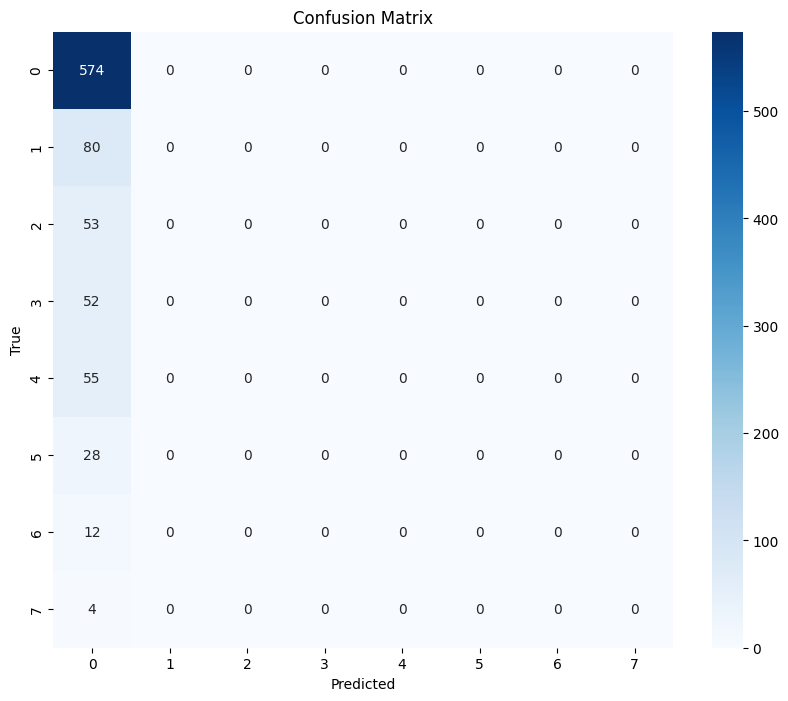

In [ ]:
from sklearn.metrics import classification_report, balanced_accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

           0       0.84      0.50      0.63       574
           1       0.31      0.50      0.38        80
           2       0.39      0.64      0.49        53
           3       0.20      0.44      0.28        52
           4       0.39      0.69      0.50        55
           5       0.23      0.36      0.28        28
           6       0.08      0.25      0.12        12
           7       0.00      0.00      0.00         4

    accuracy                           0.51       858
   macro avg       0.31      0.42      0.33       858
weighted avg       0.66      0.51      0.55       858

Balanced Accuracy: 0.42
Confusion Matrix:
 [[287  66  41  81  51  22  19   7]
 [ 19  40   5   4   2   3   7   0]
 [ 11   2  34   1   1   1   2   1]
 [ 11   7   1  23   3   4   3   0]
 [  5   4   3   2  38   2   1   0]
 [  5   6   2   0   2  10   1   2]
 [  2   3   1   2   0   1   3   0]
 [  0   3   0   1   0   0   0   0]]


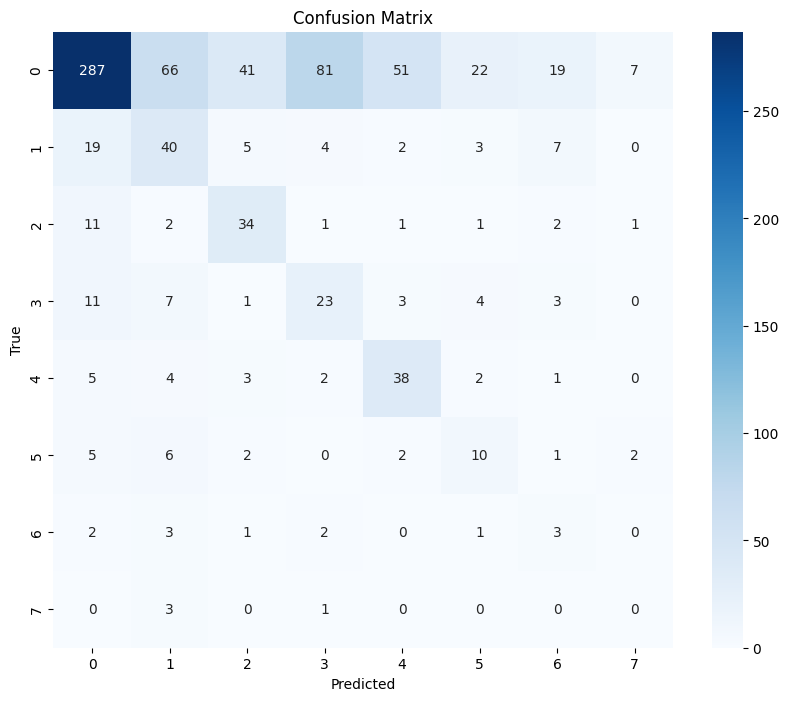

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, balanced_accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

clf = Pipeline([
    ('vectorizer_tfid', TfidfVectorizer()),
    ('smote', SMOTE(random_state=42)),
    ('Multi NB', MultinomialNB())
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy: {:.2f}".format(balanced_acc))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, balanced_accuracy_score

scores = cross_val_score(clf, process_df.stemmed_text, process_df.encoded_label, cv=20, scoring='balanced_accuracy')
print("Cross-validation scores with balanced accuracy:", scores)
print("Average balanced accuracy score:", scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 19 members, which is less than n_splits=20.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Cross-validation scores with balanced accuracy: [0.48478605 0.49040335 0.4669133  0.4572516  0.56516522 0.50156822
 0.473241   0.47934764 0.61238784 0.49114573 0.40171703 0.49304862
 0.36446678 0.42519356 0.4028534  0.48271936 0.44509657 0.60322802
 0.4401307  0.48387654]
Average balanced accuracy score: 0.4782270261458466


## Complement Naive Bayes

In [ ]:
# Fitting and transforming the 'Category' column
X_train, X_test, y_train, y_test = train_test_split(
    process_df.stemmed_text,
    process_df.encoded_label,
    test_size=0.2,
    random_state=48,
    stratify=process_df.encoded_label
)

AttributeError: 'DataFrame' object has no attribute 'stemmed_text'

In [ ]:
from sklearn.naive_bayes import ComplementNB
clf = Pipeline([
    ('vectorizer_tfid',TfidfVectorizer()),
    ('Complement NB',ComplementNB())
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.94      0.82       574
           1       0.38      0.11      0.17        80
           2       0.44      0.28      0.34        53
           3       0.90      0.17      0.29        52
           4       0.58      0.40      0.47        55
           5       0.00      0.00      0.00        28
           6       0.00      0.00      0.00        12
           7       1.00      0.25      0.40         4

    accuracy                           0.70       858
   macro avg       0.50      0.27      0.31       858
weighted avg       0.64      0.70      0.64       858



In [ ]:
from sklearn.metrics import classification_report, balanced_accuracy_score

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy: {:.2f}".format(balanced_acc))

Balanced Accuracy: 0.27


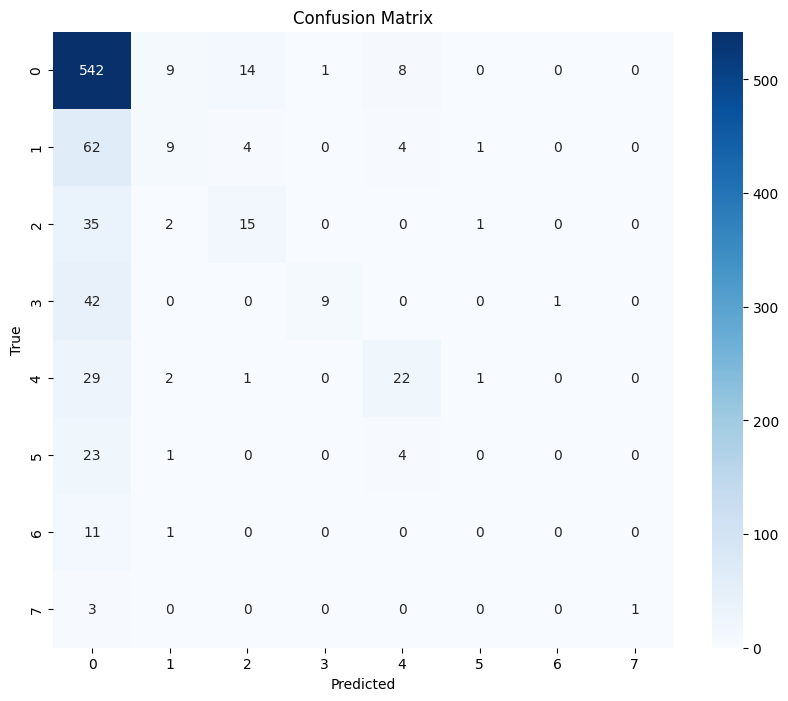

In [ ]:
from sklearn.metrics import classification_report, balanced_accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

           0       0.91      0.39      0.54       574
           1       0.33      0.45      0.38        80
           2       0.25      0.66      0.37        53
           3       0.25      0.50      0.33        52
           4       0.40      0.76      0.53        55
           5       0.21      0.46      0.29        28
           6       0.10      0.42      0.16        12
           7       0.04      0.50      0.08         4

    accuracy                           0.44       858
   macro avg       0.31      0.52      0.33       858
weighted avg       0.70      0.44      0.49       858

Balanced Accuracy: 0.52
Confusion Matrix:
 [[222  55  84  70  52  34  29  28]
 [  7  36  10   3   4   7   6   7]
 [  3   4  35   2   0   4   3   2]
 [  7   4   6  26   1   2   3   3]
 [  2   3   3   0  42   3   2   0]
 [  0   4   0   0   6  13   1   4]
 [  2   2   0   3   0   0   5   0]
 [  1   1   0   0   0   0   0   2]]


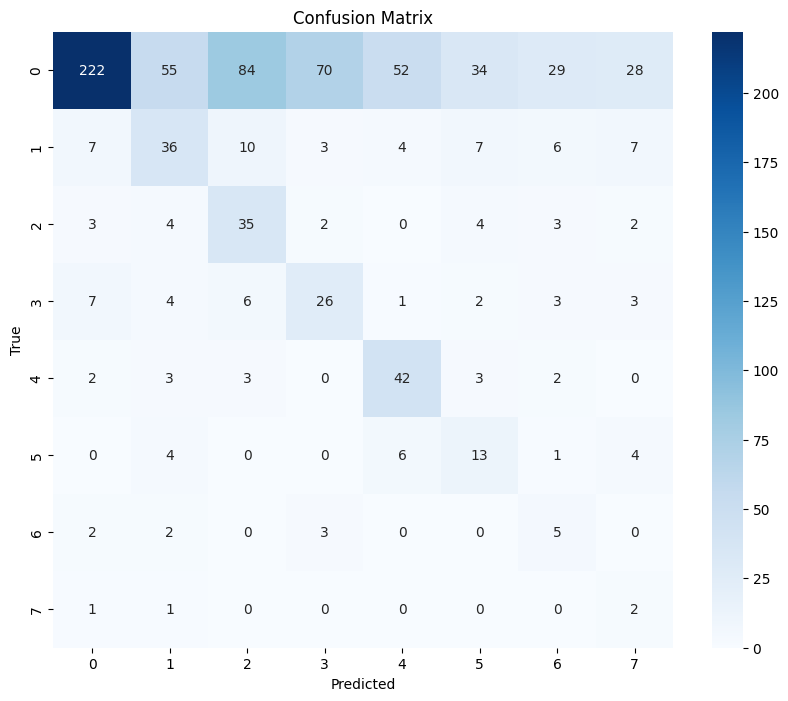

In [ ]:
clf = Pipeline([
    ('vectorizer_tfid', TfidfVectorizer()),
    ('smote', SMOTE(random_state=42)),
    ('Complement NB', ComplementNB())
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy: {:.2f}".format(balanced_acc))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, balanced_accuracy_score

scores = cross_val_score(clf, process_df.stemmed_text, process_df.encoded_label, cv=19, scoring='balanced_accuracy')
print("Cross-validation scores with balanced accuracy:", scores)
print("Average balanced accuracy score:", scores.mean())

Cross-validation scores with balanced accuracy: [0.55074799 0.44550221 0.4434376  0.45955535 0.49476703 0.46942468
 0.44034747 0.54304583 0.5021978  0.44828755 0.51898394 0.37388897
 0.61346184 0.38515058 0.45096184 0.41954431 0.55562126 0.46302428
 0.63085383]
Average balanced accuracy score: 0.48467391335572757


In [ ]:
# from imblearn.over_sampling import BorderlineSMOTE
# from imblearn.combine import SMOTEENN
# from imblearn.pipeline import Pipeline

# clf = ImbPipeline([
#     ('vectorizer_tfid', TfidfVectorizer()),
#     ('borderline_smote', BorderlineSMOTE(kind='borderline-1', random_state=42)),
#     ('smote_enn', SMOTEENN(random_state=42)),
#     ('complement_nb', ComplementNB())
# ])

In [ ]:
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)

# print(classification_report(y_test, y_pred))

# balanced_acc = balanced_accuracy_score(y_test, y_pred)
# print("Balanced Accuracy: {:.2f}".format(balanced_acc))

# conf_matrix = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:\n", conf_matrix)

# plt.figure(figsize=(10, 8))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix')
# plt.show()

## Hypertuning MNB

In [ ]:
!pip install optuna

In [ ]:
import optuna
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.metrics import accuracy_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.metrics as metrics

In [ ]:
def objective(trial):
    # Define hyperparameter search space
    params = {
        'vectorizer_tfid__max_df': trial.suggest_float('max_df', 0.7, 1.0),
        'vectorizer_tfid__min_df': trial.suggest_int('min_df', 1, 5),
        'vectorizer_tfid__ngram_range': trial.suggest_categorical('ngram_range', [(1, 1), (1, 2), (1, 3)]),
        'Multi_NB__alpha': trial.suggest_float('alpha', 0.0001, 10.0, log=True),
        'Multi_NB__fit_prior': trial.suggest_categorical('fit_prior', [True, False]),
    }

    # Create pipeline with preprocessing, oversampling, and classifier
    clf = Pipeline([
        ('vectorizer_tfid', TfidfVectorizer()),
        ('smote', SMOTE(random_state=42)),
        ('Multi_NB', MultinomialNB())
    ])

    clf.set_params(**params)

    # Perform cross-validation
    y_pred = cross_val_predict(clf, X_train, y_train, cv=5)
    balanced_acc = balanced_accuracy_score(y_train, y_pred)
    return balanced_acc

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)  # Adjust the number of trials as needed

best_params = study.best_params
best_balanced_accuracy = study.best_value

print("Best Parameters:", best_params)
print("Best Balanced Accuracy:", best_balanced_accuracy)

[I 2024-06-19 10:17:49,837] A new study created in memory with name: no-name-2a98f26f-a6c6-47c7-851a-6e25b3786d49
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (1, 1) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (1, 2) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (1, 3) which is of type tuple.
  warnings.warn(message)
[I 2024-06-19 10:17:51,847] Trial 0 finished with value: 0.42873604583338365 and parameters

KeyboardInterrupt: 

Best Parameters: {'max_df': 0.7811824311967861, 'min_df': 1, 'ngram_range': (1, 1), 'alpha': 2.365146247125818, 'fit_prior': False}
Best Balanced Accuracy: 0.5099212285947556

Best Parameters: {'max_df': 0.9890517057322616, 'min_df': 2, 'ngram_range': (1, 2), 'alpha': 4.404138691226501, 'fit_prior': False}
Best Balanced Accuracy: 0.518263634593383

Best Parameters: {'max_df': 0.7311943203661646, 'min_df': 1, 'ngram_range': (1, 1), 'alpha': 6.937482484646261, 'fit_prior': True}
Best Balanced Accuracy: 0.48951241832842346

Best Parameters: {'max_df': 0.9175270951035617, 'min_df': 1, 'ngram_range': (1, 1), 'alpha': 7.269090935857578, 'fit_prior': True}
Best Balanced Accuracy: 0.4829219486320019

Best Parameters: {'max_df': 0.747420194008757, 'min_df': 3, 'ngram_range': '1,1', 'alpha': 5.0721732550848975, 'fit_prior': True}
Best Balanced Accuracy: 0.45295071008480814

In [ ]:
best_params =  {'max_df': 0.9175270951035617, 'min_df': 1, 'ngram_range': (1, 1), 'alpha': 7.269090935857578, 'fit_prior': True}

clf = Pipeline([
    ('vectorizer_tfid', TfidfVectorizer()),
    ('smote', SMOTE(random_state=42)),
    ('Multi_NB', MultinomialNB())
])

              precision    recall  f1-score   support

           0       0.92      0.32      0.48       574
           1       0.37      0.54      0.44        80
           2       0.33      0.64      0.44        53
           3       0.20      0.58      0.30        52
           4       0.37      0.82      0.51        55
           5       0.18      0.39      0.25        28
           6       0.02      0.08      0.03        12
           7       0.04      0.50      0.08         4

    accuracy                           0.41       858
   macro avg       0.30      0.48      0.31       858
weighted avg       0.71      0.41      0.45       858

Balanced Accuracy: 0.4840755571031975


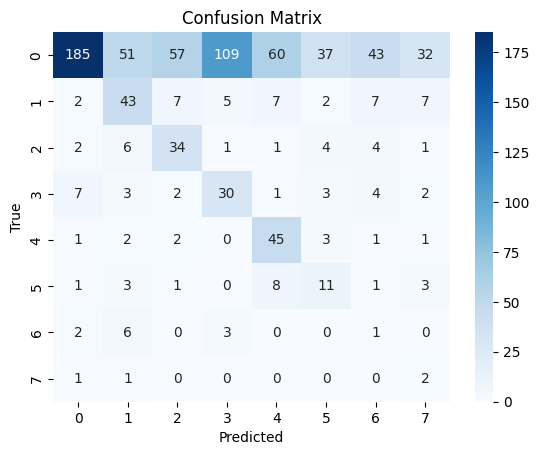

In [ ]:
# Update the keys to match the pipeline structure
updated_best_params = {
    'vectorizer_tfid__max_df': best_params['max_df'],
    'vectorizer_tfid__min_df': best_params['min_df'],
    'vectorizer_tfid__ngram_range': best_params['ngram_range'],
    'Multi_NB__alpha': best_params['alpha'],
    'Multi_NB__fit_prior': best_params['fit_prior']
}

clf.set_params(**updated_best_params)

# Fit on the entire training set
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
balanced_acc = metrics.balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy:", balanced_acc)

# Confusion Matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, balanced_accuracy_score

scores = cross_val_score(clf, process_df.stemmed_text, process_df.encoded_label, cv=20, scoring='balanced_accuracy')
print("Cross-validation scores with balanced accuracy:", scores)
print("Average balanced accuracy score:", scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 19 members, which is less than n_splits=20.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Cross-validation scores with balanced accuracy: [0.52265963 0.50590243 0.50090014 0.40404457 0.58833753 0.43457914
 0.43549298 0.48609585 0.59682961 0.44016542 0.46118465 0.49699675
 0.37973901 0.49033675 0.45843115 0.58812021 0.4353355  0.59247627
 0.48564769 0.58626166]
Average balanced accuracy score: 0.494476846709577


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, balanced_accuracy_score

scores = cross_val_score(clf, process_df.stemmed_text, process_df.encoded_label, cv=5, scoring='balanced_accuracy')
print("Cross-validation scores with balanced accuracy:", scores)
print("Average balanced accuracy score:", scores.mean())

Cross-validation scores with balanced accuracy: [0.49063292 0.47384274 0.46589156 0.45932124 0.51748998]
Average balanced accuracy score: 0.4814356887172556


## Hypertuning CNB

In [ ]:
import optuna
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.metrics import accuracy_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.metrics as metrics

In [ ]:
def objective(trial):
    params = {
        'vectorizer_tfid__max_df': trial.suggest_float('max_df', 0.7, 1.0),
        'vectorizer_tfid__min_df': trial.suggest_int('min_df', 1, 5),
        'vectorizer_tfid__ngram_range': trial.suggest_categorical('ngram_range', [(1, 1), (1, 2), (1, 3)]),
        'Complement NB__alpha': trial.suggest_float('alpha', 0.0001, 10.0, log=True),
        'Complement NB__fit_prior': trial.suggest_categorical('fit_prior', [True, False])
    }

    clf = Pipeline([
        ('vectorizer_tfid', TfidfVectorizer()),
        ('smote', SMOTE(random_state=42)),
        ('Complement NB', ComplementNB())
    ])

    clf.set_params(**params)
    y_pred = cross_val_predict(clf, X_train, y_train, cv=5)
    balanced_acc = balanced_accuracy_score(y_train, y_pred)
    return balanced_acc

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)  # Adjust the number of trials as needed

best_params = study.best_params
best_balanced_accuracy = study.best_value

print("Best Parameters:", best_params)
print("Best Balanced Accuracy:", best_balanced_accuracy)

[I 2024-06-19 21:57:41,795] A new study created in memory with name: no-name-fba16747-f236-4e8c-9643-268b0bcc9508
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (1, 1) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (1, 2) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (1, 3) which is of type tuple.
  warnings.warn(message)
[I 2024-06-19 21:57:42,820] Trial 0 finished with value: 0.46539537163095135 and parameters

Best Parameters: {'max_df': 0.9628165216339234, 'min_df': 2, 'ngram_range': (1, 2), 'alpha': 9.901945351842658, 'fit_prior': True}
Best Balanced Accuracy: 0.49703654967813354


Best Parameters: {'max_df': 0.8082672145608685, 'min_df': 1, 'ngram_range': (1, 1), 'alpha': 7.376581325882516, 'fit_prior': False}
Best Balanced Accuracy: 0.5079820555579302

Best Parameters: {'max_df': 0.792372468817151, 'min_df': 2, 'ngram_range': (1, 2), 'alpha': 6.832857422236419, 'fit_prior': False}
Best Balanced Accuracy: 0.5094204281803291

Best Parameters: {'max_df': 0.8981026022043065, 'min_df': 2, 'ngram_range': (1, 2), 'alpha': 7.09904501602026, 'fit_prior': False}
Best Balanced Accuracy: 0.49976783137348924

Best Parameters: {'max_df': 0.8585283016647097, 'min_df': 2, 'ngram_range': '1,1', 'alpha': 6.785534934077499, 'fit_prior': False}
Best Balanced Accuracy: 0.466018772048982


{'max_df': 0.8981026022043065, 'min_df': 2, 'ngram_range': (1, 2), 'alpha': 7.09904501602026, 'fit_prior': False}
Balanced Accuracy: 0.518581152041444

{'max_df': 0.8981026022043065, 'min_df': 2, 'ngram_range': (1, 2), 'alpha': 7.09904501602026, 'fit_prior': False}
Balanced Accuracy: 0.518581152041444
SUBMISI 1


Best Parameters: {'max_df': 0.9724051167278713, 'min_df': 1, 'ngram_range': (1, 2), 'alpha': 8.941606263541969, 'fit_prior': False}
Best Balanced Accuracy: 0.5015551025475063
Y : 0.5073435816685732


Best Parameters: {'max_df': 0.9912893841828742, 'min_df': 2, 'ngram_range': (1, 2), 'alpha': 7.316012911295256, 'fit_prior': False}
Best Balanced Accuracy: 0.5034884477988669
Balanced Accuracy: 0.5075575595652899


Best Parameters: {'ngram_range': '1,1', 'max_df': 0.9645828154386823, 'min_df': 3, 'sublinear_tf': True, 'use_idf': True, 'smooth_idf': False, 'norm': 'l2', 'k_neighbors': 9, 'sampling_strategy': 'not majority', 'alpha': 7.360530178340255, 'fit_prior': True}
Best Balanced Accuracy: 0.5116794761306663

- Best Parameters: {'ngram_range': '1,1', 'max_df': 0.8457609654337319, 'min_df': 3, 'sublinear_tf': True, 'use_idf': False, 'smooth_idf': False, 'norm': 'l2', 'k_neighbors': 3, 'sampling_strategy': 'all', 'alpha': 2.6846620260507925, 'fit_prior': False}
Best Balanced Accuracy: 0.5070895285529885
- Best Parameters: {'max_df': 0.7393099547309316, 'min_df': 1, 'ngram_range': (1, 1), 'alpha': 6.991920000411702, 'fit_prior': True}
Best Balanced Accuracy: 0.4908824048235885
- est Parameters: {'max_df': 0.8100622561158868, 'min_df': 2, 'ngram_range': (1, 3), 'alpha': 7.5871477036789505, 'fit_prior': True}
Best Balanced Accuracy: 0.493863270956149
- Best Parameters: {'max_df': 0.9628165216339234, 'min_df': 2, 'ngram_range': (1, 2), 'alpha': 9.901945351842658, 'fit_prior': True}
Best Balanced Accuracy: 0.49703654967813354

In [ ]:
best_params = {'max_df': 0.9628165216339234, 'min_df': 2, 'ngram_range': (1, 2), 'alpha': 9.901945351842658, 'fit_prior': True}
clf = Pipeline([
    ('vectorizer_tfid', TfidfVectorizer()),
    ('smote', SMOTE(random_state=42)),
    ('Complement NB', ComplementNB())
])

              precision    recall  f1-score   support

           0       0.94      0.23      0.37       574
           1       0.29      0.38      0.32        80
           2       0.26      0.66      0.38        53
           3       0.21      0.48      0.30        52
           4       0.37      0.78      0.50        55
           5       0.18      0.46      0.26        28
           6       0.09      0.58      0.15        12
           7       0.02      0.50      0.04         4

    accuracy                           0.34       858
   macro avg       0.30      0.51      0.29       858
weighted avg       0.72      0.34      0.36       858

Balanced Accuracy: 0.5096613919712747


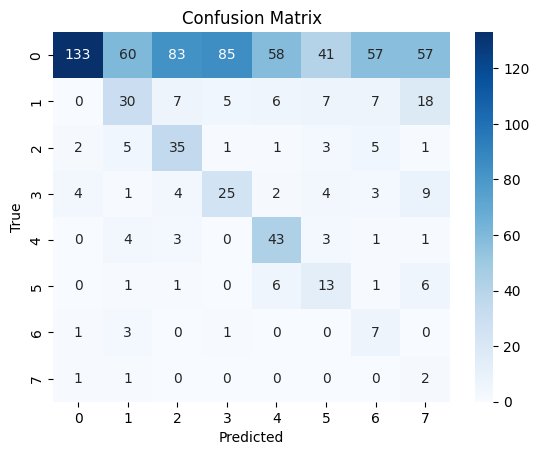

In [ ]:
# Update the keys to match the pipeline structure
updated_best_params = {
    'vectorizer_tfid__max_df': best_params['max_df'],
    'vectorizer_tfid__min_df': best_params['min_df'],
    'vectorizer_tfid__ngram_range': best_params['ngram_range'],
    'Complement NB__alpha': best_params['alpha'],
    'Complement NB__fit_prior': best_params['fit_prior']
}

clf.set_params(**updated_best_params)

# Fit on the entire training set
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
balanced_acc = metrics.balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy:", balanced_acc)

# Confusion Matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, balanced_accuracy_score

scores = cross_val_score(clf, process_df.stemmed_text, process_df.encoded_label, cv=20, scoring='balanced_accuracy')
print("Cross-validation scores with balanced accuracy:", scores)
print("Average balanced accuracy score:", scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 19 members, which is less than n_splits=20.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Cross-validation scores with balanced accuracy: [0.52158258 0.46611722 0.61090888 0.45304487 0.54401709 0.44178304
 0.44151213 0.50760945 0.62281756 0.50941557 0.45517816 0.50510739
 0.51474983 0.57112471 0.49965659 0.54215992 0.39990218 0.56126582
 0.47452131 0.61569056]
Average balanced accuracy score: 0.512908244181153


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, balanced_accuracy_score

scores = cross_val_score(clf, process_df.stemmed_text, process_df.encoded_label, cv=5, scoring='balanced_accuracy')
print("Cross-validation scores with balanced accuracy:", scores)
print("Average balanced accuracy score:", scores.mean())

Cross-validation scores with balanced accuracy: [0.5148997  0.5329643  0.4834181  0.53541391 0.5100102 ]
Average balanced accuracy score: 0.5153412425348745


## RandomOversampler

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
import optuna
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.metrics import accuracy_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.metrics as metrics

In [ ]:
def objective(trial):
    # Define hyperparameter search space
    params = {
        'vectorizer_tfid__max_df': trial.suggest_float('max_df', 0.7, 1.0),
        'vectorizer_tfid__min_df': trial.suggest_int('min_df', 1, 5),
        'vectorizer_tfid__ngram_range': trial.suggest_categorical('ngram_range', [(1, 1), (1, 2), (1, 3)]),
        'Multi_NB__alpha': trial.suggest_float('alpha', 0.0001, 10.0, log=True),
        'Multi_NB__fit_prior': trial.suggest_categorical('fit_prior', [True, False]),
    }

    # Create pipeline with preprocessing, oversampling, and classifier
    clf = Pipeline([
        ('vectorizer_tfid', TfidfVectorizer()),
        ('ros', RandomOverSampler(random_state=42)),
        ('Multi_NB', MultinomialNB())
    ])

    clf.set_params(**params)

    # Perform cross-validation
    y_pred = cross_val_predict(clf, X_train, y_train, cv=5)
    balanced_acc = balanced_accuracy_score(y_train, y_pred)
    return balanced_acc

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)  # Adjust the number of trials as needed

best_params = study.best_params
best_balanced_accuracy = study.best_value

print("Best Parameters:", best_params)
print("Best Balanced Accuracy:", best_balanced_accuracy)

[I 2024-06-19 08:37:33,475] A new study created in memory with name: no-name-ef22569d-8fca-4a95-aef5-a9d2c6eac505
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (1, 1) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (1, 2) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (1, 3) which is of type tuple.
  warnings.warn(message)
[I 2024-06-19 08:37:34,051] Trial 0 finished with value: 0.3829203793777596 and parameters:

Best Parameters: {'max_df': 0.755829382105886, 'min_df': 2, 'ngram_range': (1, 2), 'alpha': 7.117712684116551, 'fit_prior': False}
Best Balanced Accuracy: 0.4858708152040853


Best Parameters: {'max_df': 0.8928230445716382, 'min_df': 2, 'ngram_range': (1, 2), 'alpha': 6.021532907829793, 'fit_prior': False}
Best Balanced Accuracy: 0.5156526830255661

Best Parameters: {'max_df': 0.755829382105886, 'min_df': 2, 'ngram_range': (1, 2), 'alpha': 7.117712684116551, 'fit_prior': False}
Best Balanced Accuracy: 0.4858708152040853

In [ ]:
best_params = {'max_df': 0.755829382105886, 'min_df': 2, 'ngram_range': (1, 2), 'alpha': 7.117712684116551, 'fit_prior': False}

clf = Pipeline([
    ('vectorizer_tfid', TfidfVectorizer()),
    ('ros', RandomOverSampler(random_state=42)),
    ('Multi_NB', MultinomialNB())
])

              precision    recall  f1-score   support

           0       0.91      0.32      0.48       574
           1       0.35      0.56      0.43        80
           2       0.32      0.66      0.43        53
           3       0.22      0.48      0.30        52
           4       0.36      0.75      0.49        55
           5       0.23      0.46      0.31        28
           6       0.05      0.25      0.08        12
           7       0.03      0.50      0.05         4

    accuracy                           0.41       858
   macro avg       0.31      0.50      0.32       858
weighted avg       0.71      0.41      0.45       858

Balanced Accuracy: 0.49842858260584333


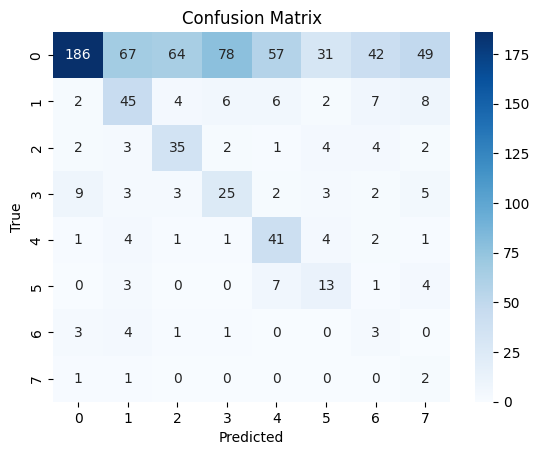

In [ ]:
# Update the keys to match the pipeline structure
updated_best_params = {
    'vectorizer_tfid__max_df': best_params['max_df'],
    'vectorizer_tfid__min_df': best_params['min_df'],
    'vectorizer_tfid__ngram_range': best_params['ngram_range'],
    'Multi_NB__alpha': best_params['alpha'],
    'Multi_NB__fit_prior': best_params['fit_prior']
}

clf.set_params(**updated_best_params)

# Fit on the entire training set
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
balanced_acc = metrics.balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy:", balanced_acc)

# Confusion Matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, balanced_accuracy_score

scores = cross_val_score(clf, process_df.stemmed_text, process_df.encoded_label, cv=20, scoring='balanced_accuracy')
print("Cross-validation scores with balanced accuracy:", scores)
print("Average balanced accuracy score:", scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 19 members, which is less than n_splits=20.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Cross-validation scores with balanced accuracy: [0.53571845 0.49466991 0.47086143 0.38358326 0.53675786 0.45959821
 0.42649    0.55383089 0.63615971 0.4963375  0.44157925 0.53590784
 0.36887488 0.56601107 0.4401307  0.52236722 0.42793248 0.54564186
 0.48101482 0.64567308]
Average balanced accuracy score: 0.49845702132297526


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, balanced_accuracy_score

scores = cross_val_score(clf, process_df.stemmed_text, process_df.encoded_label, cv=5, scoring='balanced_accuracy')
print("Cross-validation scores with balanced accuracy:", scores)
print("Average balanced accuracy score:", scores.mean())

Cross-validation scores with balanced accuracy: [0.47244026 0.47896609 0.50652407 0.48301266 0.50695478]
Average balanced accuracy score: 0.4895795736673997


## RandomOversampler (Complement)

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
import optuna
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.metrics import accuracy_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.metrics as metrics

In [ ]:
def objective(trial):
    # Define hyperparameter search space
    params = {
        'vectorizer_tfid__max_df': trial.suggest_float('max_df', 0.7, 1.0),
        'vectorizer_tfid__min_df': trial.suggest_int('min_df', 1, 5),
        'vectorizer_tfid__ngram_range': trial.suggest_categorical('ngram_range', [(1, 1), (1, 2), (1, 3)]),
        'Complement NB__alpha': trial.suggest_float('alpha', 0.0001, 10.0, log=True),  # Corrected line
        'Complement NB__fit_prior': trial.suggest_categorical('fit_prior', [True, False]),  # Corrected line
    }

    # Create pipeline with preprocessing, oversampling, and classifier
    clf = Pipeline([
        ('vectorizer_tfid', TfidfVectorizer()),
        ('ros', RandomOverSampler(random_state=42)),
        ('Complement NB', ComplementNB())  # Ensure this name matches in set_params
    ])

    clf.set_params(**params)

    # Perform cross-validation
    y_pred = cross_val_predict(clf, X_train, y_train, cv=5)
    balanced_acc = balanced_accuracy_score(y_train, y_pred)
    return balanced_acc

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)  # Adjust the number of trials as needed

best_params = study.best_params
best_balanced_accuracy = study.best_value

print("Best Parameters:", best_params)
print("Best Balanced Accuracy:", best_balanced_accuracy)

[I 2024-06-19 15:20:31,172] A new study created in memory with name: no-name-abdd48ca-4c20-467b-a174-490d1074384b
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (1, 1) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (1, 2) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (1, 3) which is of type tuple.
  warnings.warn(message)
[I 2024-06-19 15:20:33,085] Trial 0 finished with value: 0.39150407801578735 and parameters

Best Parameters: {'max_df': 0.9221791266700505, 'min_df': 3, 'ngram_range': (1, 2), 'alpha': 9.4039784775262, 'fit_prior': False}
Best Balanced Accuracy: 0.49771204531946284


Best Parameters: {'max_df': 0.8928230445716382, 'min_df': 2, 'ngram_range': (1, 2), 'alpha': 6.021532907829793, 'fit_prior': False}
Best Balanced Accuracy: 0.5156526830255661

Best Parameters: {'max_df': 0.755829382105886, 'min_df': 2, 'ngram_range': (1, 2), 'alpha': 7.117712684116551, 'fit_prior': False}
Best Balanced Accuracy: 0.4858708152040853

Best Parameters: {'max_df': 0.8701865648562105, 'min_df': 4, 'ngram_range': (1, 2), 'alpha': 7.969285495125548, 'fit_prior': False}
Best Balanced Accuracy: 0.4984393983495311

Best Parameters: {'max_df': 0.9624967804890854, 'min_df': 2, 'ngram_range': (1, 2), 'alpha': 6.6852701841511175, 'fit_prior': False}
Best Balanced Accuracy: 0.5033435202852962

Best Parameters: {'max_df': 0.9221791266700505, 'min_df': 3, 'ngram_range': (1, 2), 'alpha': 9.4039784775262, 'fit_prior': False}
Best Balanced Accuracy: 0.49771204531946284

In [ ]:
best_params = {'max_df': 0.9221791266700505, 'min_df': 3, 'ngram_range': (1, 2), 'alpha': 9.4039784775262, 'fit_prior': False}

clf = Pipeline([
    ('vectorizer_tfid', TfidfVectorizer()),
    ('ros', RandomOverSampler(random_state=42)),
    ('Complement NB', ComplementNB())
])

              precision    recall  f1-score   support

           0       0.95      0.25      0.39       574
           1       0.34      0.45      0.39        80
           2       0.27      0.64      0.38        53
           3       0.23      0.52      0.32        52
           4       0.39      0.78      0.52        55
           5       0.17      0.43      0.24        28
           6       0.06      0.42      0.11        12
           7       0.02      0.50      0.04         4

    accuracy                           0.35       858
   macro avg       0.30      0.50      0.30       858
weighted avg       0.73      0.35      0.38       858

Balanced Accuracy: 0.4979301349440558


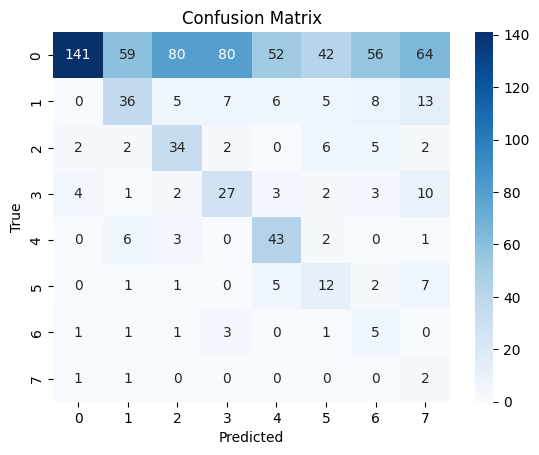

In [ ]:
# Update the keys to match the pipeline structure
updated_best_params = {
    'vectorizer_tfid__max_df': best_params['max_df'],
    'vectorizer_tfid__min_df': best_params['min_df'],
    'vectorizer_tfid__ngram_range': best_params['ngram_range'],
    'Complement NB__alpha': best_params['alpha'],
    'Complement NB__fit_prior': best_params['fit_prior']
}

clf.set_params(**updated_best_params)

# Fit on the entire training set
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
balanced_acc = metrics.balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy:", balanced_acc)

# Confusion Matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, balanced_accuracy_score

scores = cross_val_score(clf, process_df.stemmed_text, process_df.encoded_label, cv=20, scoring='balanced_accuracy')
print("Cross-validation scores with balanced accuracy:", scores)
print("Average balanced accuracy score:", scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 19 members, which is less than n_splits=20.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Cross-validation scores with balanced accuracy: [0.5073874  0.50396895 0.48590888 0.44220658 0.68489011 0.47214019
 0.45912126 0.46416579 0.58073971 0.47735475 0.39109848 0.53457168
 0.50825633 0.57573884 0.45449342 0.5154304  0.4148206  0.59779804
 0.45566517 0.62867133]
Average balanced accuracy score: 0.5077213954070158


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, balanced_accuracy_score

scores = cross_val_score(clf, process_df.stemmed_text, process_df.encoded_label, cv=5, scoring='balanced_accuracy')
print("Cross-validation scores with balanced accuracy:", scores)
print("Average balanced accuracy score:", scores.mean())

Cross-validation scores with balanced accuracy: [0.51378602 0.49526965 0.44953318 0.5057973  0.4805862 ]
Average balanced accuracy score: 0.4889944708389312


## Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier, VotingClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, balanced_accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Create a pipeline for ComplementNB
nb_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', ComplementNB())
])

# Create a pipeline for DecisionTreeClassifier
dt_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', ComplementNB())
])

In [ ]:
# Bagging for ComplementNB
bagging_nb = BaggingClassifier(
    base_estimator=nb_pipeline,
    n_estimators=10,
    random_state=42
)

# Bagging for DecisionTreeClassifier
bagging_dt = BaggingClassifier(
    base_estimator=dt_pipeline,
    n_estimators=10,
    random_state=42
)

In [ ]:
# Combine the bagging classifiers using VotingClassifier
voting_clf = VotingClassifier(
    estimators=[
        ('nb', bagging_nb),
        ('dt', bagging_dt)
    ],
    voting='soft'  # or 'hard' depending on your preference
)

In [ ]:
# Assuming X and y are your feature matrix and target vector
X_train, X_test, y_train, y_test = train_test_split(
    process_df.stemmed_text,
    process_df.encoded_label,
    test_size=0.2,
    random_state=42,
    stratify=process_df.encoded_label
)

# Fit the ensemble model
voting_clf.fit(X_train, y_train)

# Make predictions
y_pred = voting_clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Calculate and print the balanced accuracy score
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy: {:.2f}".format(balanced_acc))

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=['mulai ahok bikin fatwa menjarain ahok maaruf amin dateng 212 jokowi salah tetep anies pentol 212 masuk timses prabowo sih'
 'tulus prabowo cermin semangat didik generasi muda cinta indonesia buktinyata tiadahenti'
 'duga oknum ngomong bngst pa anies anies pilih tepat masa depan indonesia'
 ...
 'surat buka hati nurani akun akun dukung prabowo bantu sebar tahu tanya hati nurani selamat dini hari rekan akun dukung prabowo gibran tanya hati nurani rekan semua jadi biar hati nurani rekan semua jawab jujur apa rekan tahu kalo gibran maju cawapres landas atur buat situasi kondisi sarat langgar etik buat hati nurani mu ganggu rekan tahu kalo gibran daftar revisi batas usia pkpu buat gibran tetap daftar buat hati nurani mu ganggu rekan tahu kalo uu ikn beri wenang luar biasa besar eksekutif rabas atur apa prabowo gibran dukung buat hati nurani mu ganggu rekan tahu kalo prabowo periksa kait kasus langgar ham masa lampau bahkan rekan suka cita bengkok isu isu 5 tahun 800 kali giat kamis laku pernah aksi nyata buat hati nurani mu ganggu rekan tahu kalo proses gibran maju walikota solo proses instan ambil form bacawalkot sama ambil form anggota pdip buat hati nurani mu ganggu rekan tinggal jakarta tahu kalo cfd giat bebas giat politik gibran santai bagi2 susu sana buat hati nurani mu ganggu rekan tahu prabowo tampak emosional debat capres 1 2 gibran debat capres 1 laku gesture provokatif dukung lawan buat hati nurani mu ganggu rekan tahu kalo orang nama miftah membagi2kan uang sama kampanye prabowo gibran buat hati nurani mu ganggu rekan tahu prabowo kerap ucap kata2 kasar provokatif depan massa entah acara tutup buka umum buat hati nurani mu ganggu rekan tahu kalo bansos uang negara pantas klaim orang menteri sembari kampanye prabowo gibran buat hati nurani mu ganggu rekan tahu kalo presiden jadi jubir kpu jubir kemenhan jubir paslon prabowo beliau sangat gercep sangkut isu kait prabowo gibran buat hati nurani mu ganggu rekan tahu kalo presiden pihak beliau tedeng aling2 tunjuk sikap dukung prabowo buat hati nurani mu ganggu rekan tahu kalo prabowo usaha kelas kakap tanah kuasa luar biasa luas rekan tuding orang jadi oligark usaha buat hati nurani mu ganggu rekan tahu kalo fasilitas negara kenan penting pribadi prabowo kerap rabas atur malu2 buat hati nurani mu ganggu rekan tahu banyak akun terang2an hujat prabowo gibran tiba2 balik arah memuja2 buat hati nurani mu ganggu walaupun segala sepak terjang duo manusia prabowo gibran tuju penting bangsa negara tuju hendak capai cara bengkok rabas atur sana sini buat hati nurani mu ganggu tantang hati nurani rekan dukung prabowo jawab surat buka nilai sama kapasitas hati nurani semua rekan dukung prabowo kalo rekan berani tanya hati nurani rekan sendiri'
 'survei baru 2 minggu jelang pilpres prabowo gibran tembus 507 persen pilrpes satu putar depan mata'
 'breaking news sumber data anies debat capres soal lahan milik prabowo sangat shahih akurat sumber presiden republik indonesia'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## IDK ADASYN

              precision    recall  f1-score   support

           0       0.89      0.31      0.46       574
           1       0.25      0.35      0.29        80
           2       0.32      0.75      0.45        53
           3       0.21      0.48      0.29        52
           4       0.40      0.76      0.53        55
           5       0.25      0.54      0.34        28
           6       0.08      0.58      0.14        12
           7       0.02      0.25      0.04         4

    accuracy                           0.39       858
   macro avg       0.30      0.50      0.32       858
weighted avg       0.69      0.39      0.43       858

Balanced Accuracy: 0.50
Confusion Matrix:
 [[178  70  69  85  53  32  57  30]
 [ 12  28   7   6   3   5  14   5]
 [  5   1  40   0   0   2   3   2]
 [  3   6   4  25   4   3   5   2]
 [  1   2   2   2  42   3   2   1]
 [  0   1   4   0   2  15   2   4]
 [  1   3   0   0   0   1   7   0]
 [  0   1   0   1   1   0   0   1]]


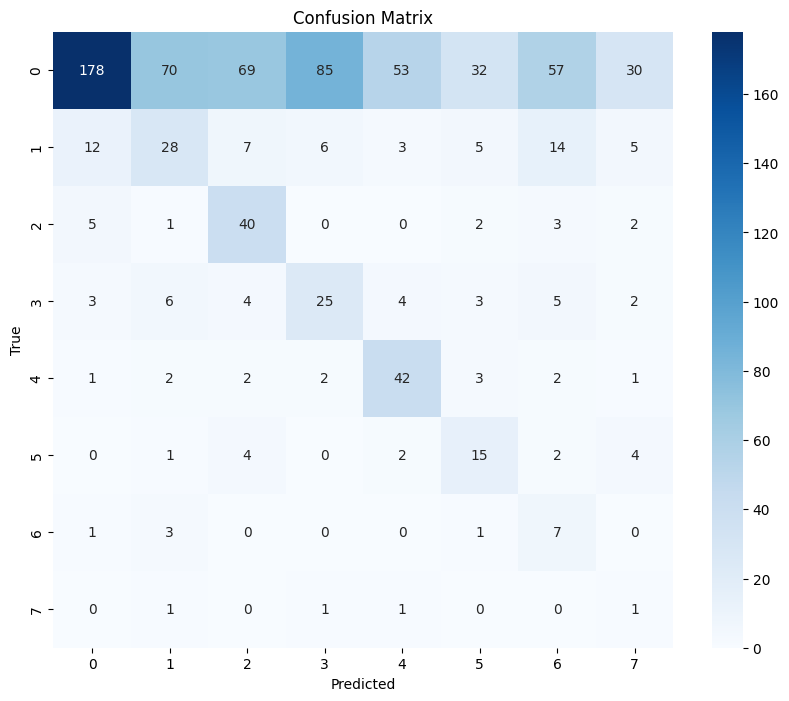

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import ADASYN
from sklearn.naive_bayes import ComplementNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, balanced_accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Definisikan pipeline dengan ADASYN
clf = Pipeline([
    ('vectorizer_tfid', TfidfVectorizer()),
    ('adasyn', ADASYN(random_state=42)),
    ('Compe NB', ComplementNB())
])

# Fit model
clf.fit(X_train, y_train)

# Prediksi
y_pred = clf.predict(X_test)

# Evaluasi hasil
print(classification_report(y_test, y_pred))

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy: {:.2f}".format(balanced_acc))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Hypertuning ADASYN

In [ ]:
import optuna
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.metrics import accuracy_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.metrics as metrics

In [ ]:
def objective(trial):
    params = {
        'vectorizer_tfid__max_df': trial.suggest_float('max_df', 0.7, 1.0),
        'vectorizer_tfid__min_df': trial.suggest_int('min_df', 1, 5),
        'vectorizer_tfid__ngram_range': trial.suggest_categorical('ngram_range', [(1, 1), (1, 2), (1, 3)]),
        'Complement NB__alpha': trial.suggest_float('alpha', 0.0001, 10.0, log=True),
        'Complement NB__fit_prior': trial.suggest_categorical('fit_prior', [True, False]),
        'adasyn__n_neighbors': trial.suggest_int('n_neighbors', 3, 10),
        'adasyn__sampling_strategy': trial.suggest_categorical('sampling_strategy', ['not majority', 'all'])
    }

    clf = Pipeline([
        ('vectorizer_tfid', TfidfVectorizer()),
        ('adasyn', ADASYN(random_state=42)),
        ('Complement NB', ComplementNB())
    ])

    clf.set_params(**params)
    y_pred = cross_val_predict(clf, X_train, y_train, cv=5)
    balanced_acc = balanced_accuracy_score(y_train, y_pred)
    return balanced_acc

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)  # Adjust the number of trials as needed

best_params = study.best_params
best_balanced_accuracy = study.best_value

print("Best Parameters:", best_params)
print("Best Balanced Accuracy:", best_balanced_accuracy)

[I 2024-06-19 21:31:41,040] A new study created in memory with name: no-name-6b3850af-1b89-4a8d-a202-af160fe27cfa
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (1, 1) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (1, 2) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (1, 3) which is of type tuple.
  warnings.warn(message)
[I 2024-06-19 21:31:57,460] Trial 0 finished with value: 0.4632591444695533 and parameters:

Best Parameters: {'max_df': 0.9889048937238344, 'min_df': 5, 'ngram_range': (1, 2), 'alpha': 2.023002218208899, 'fit_prior': True, 'n_neighbors': 10, 'sampling_strategy': 'not majority'}
Best Balanced Accuracy: 0.491890664517748


{'max_df': 0.8981026022043065, 'min_df': 2, 'ngram_range': (1, 2), 'alpha': 7.09904501602026, 'fit_prior': False}
Balanced Accuracy: 0.518581152041444

{'max_df': 0.8981026022043065, 'min_df': 2, 'ngram_range': (1, 2), 'alpha': 7.09904501602026, 'fit_prior': False}
Balanced Accuracy: 0.518581152041444
SUBMISI 1

- Best Parameters: {'max_df': 0.9889048937238344, 'min_df': 5, 'ngram_range': (1, 2), 'alpha': 2.023002218208899, 'fit_prior': True, 'n_neighbors': 10, 'sampling_strategy': 'not majority'}
Best Balanced Accuracy: 0.491890664517748

In [ ]:
best_params = {'max_df': 0.9889048937238344, 'min_df': 5, 'ngram_range': (1, 2), 'alpha': 2.023002218208899, 'fit_prior': True, 'n_neighbors': 10, 'sampling_strategy': 'not majority'}

clf = Pipeline([
        ('vectorizer_tfid', TfidfVectorizer()),
        ('adasyn', ADASYN(random_state=42)),
        ('Complement NB', ComplementNB())
    ])

              precision    recall  f1-score   support

           0       0.91      0.28      0.43       574
           1       0.25      0.31      0.28        80
           2       0.30      0.75      0.43        53
           3       0.22      0.50      0.31        52
           4       0.40      0.78      0.53        55
           5       0.14      0.36      0.20        28
           6       0.08      0.58      0.15        12
           7       0.03      0.50      0.05         4

    accuracy                           0.37       858
   macro avg       0.29      0.51      0.30       858
weighted avg       0.70      0.37      0.40       858

Balanced Accuracy: 0.5087498947880621


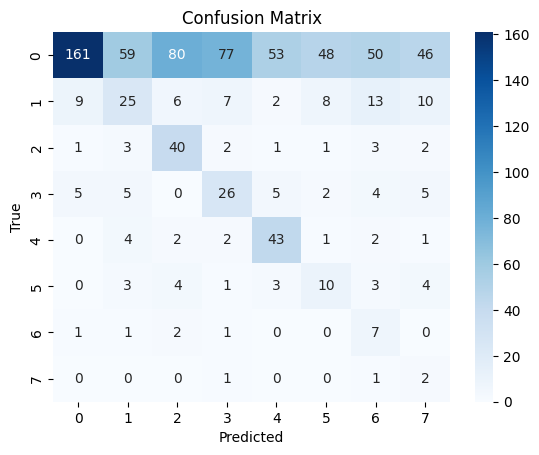

In [ ]:
# Update the keys to match the pipeline structure
updated_best_params = {
    'vectorizer_tfid__max_df': best_params['max_df'],
    'vectorizer_tfid__min_df': best_params['min_df'],
    'vectorizer_tfid__ngram_range': best_params['ngram_range'],
    'Complement NB__alpha': best_params['alpha'],
    'Complement NB__fit_prior': best_params['fit_prior'],
    'adasyn__n_neighbors':best_params['n_neighbors'],
    'adasyn__sampling_strategy':best_params['sampling_strategy']
}

clf.set_params(**updated_best_params)

# Fit on the entire training set
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
balanced_acc = metrics.balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy:", balanced_acc)

# Confusion Matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
0.5087243838861706
0.5087498947880621 >>>

0.5087243838861706

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, balanced_accuracy_score

scores = cross_val_score(clf, process_df.stemmed_text, process_df.encoded_label, cv=20, scoring='balanced_accuracy')
print("Cross-validation scores with balanced accuracy:", scores)
print("Average balanced accuracy score:", scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 19 members, which is less than n_splits=20.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Cross-validation scores with balanced accuracy: [0.4857965  0.46343864 0.60752165 0.43335241 0.54203297 0.4322745
 0.43598138 0.51487441 0.61320218 0.50706594 0.43319389 0.49281344
 0.52804903 0.55626457 0.51827547 0.37813645 0.40313853 0.55165043
 0.47828005 0.6006993 ]
Average balanced accuracy score: 0.49880208672384424


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, balanced_accuracy_score

scores = cross_val_score(clf, process_df.stemmed_text, process_df.encoded_label, cv=5, scoring='balanced_accuracy')
print("Cross-validation scores with balanced accuracy:", scores)
print("Average balanced accuracy score:", scores.mean())

Cross-validation scores with balanced accuracy: [0.51916576 0.5189158  0.46672337 0.49209685 0.49702671]
Average balanced accuracy score: 0.49878569930088174


# Export

In [ ]:
process_df[['text', 'label']].to_csv('cleaned_preprocessing (bfr stemmed).csv')

In [ ]:
process_df

,text,label,stemmed_text,encoded_label
0,kunjungan prabowo meresmikan menyerahkan proye...,Sumber Daya Alam,kunjungan prabowo meresmikan menyerahkan proye...,5
1,anies tepuk tangan meriah rektor mewajibkan ma...,Politik,anies tepuk tangan meriah rektor mewajibkan ma...,0
2,memang benar sih pendukung 01 juga dengan pend...,Demografi,memang benar sih pendukung 01 juga dengan pend...,6
3,anies bersikap kritis kinerja prabowo dianggap...,Politik,anies bersikap kritis kinerja prabowo dianggap...,0
4,anies baswedan harap asn tni polri pegang sump...,Politik,anies baswedan harap asn tni polri pegang sump...,0
...,...,...,...,...
4995,ngeliat debat kemarin pas prabowo kicep kekira...,Politik,ngeliat debat kemarin pas prabowo kicep kekira...,0
4996,masyarakat prabowo gibran memiliki visi sejala...,Politik,masyarakat prabowo gibran memiliki visi sejala...,0
4997,imo both are irrational but irrational tbh but...,Ekonomi,imo both are irrational but irrational tbh but...,4
4998,look at that ganjar sudah berkecimpung lgislat...,Pertahanan dan Keamanan,look at that ganjar sudah berkecimpung lgislat...,2


In [ ]:
dict = {
    '1':'satu',
    '3':'tiga',
    '2':'dua',
    '4':'empat',
    '5':'lima',
    '6':'enam',
    '7':'tujuh',
    '8':'delapan',
    '9':'sembilan',


}

In [ ]:
kata_p = pd.read_csv('/content/kata_pendek.csv')

In [ ]:
process_df[process_df['text'].str.contains(' you ', case=False)]

,text,label,stemmed_text,encoded_label
129,menjadikan bapak anies pemimpin republik citac...,Politik,menjadikan bapak anies pemimpin republik citac...,0
140,anies saking programnya oke orangorang fear mo...,Politik,anies saking programnya oke orangorang fear mo...,0
232,if youre still supporting prabowo 02 after he ...,Politik,if youre still supporting prabowo 02 after he ...,0
306,politics aside this is how adults should treat...,Sosial Budaya,politics aside this is how adults should treat...,1
748,desak anies sumatera barat pindah you know why,Politik,desak anies sumatera barat pindah you know why,0
1179,mendengar anies perahu anies pemimpin berpenga...,Sosial Budaya,mendengar anies perahu anies pemimpin berpenga...,1
1667,mendengar jadi bener-bener tidak pakai intelek...,Politik,mendengar jadi bener-bener tidak pakai intelek...,0
1708,do you get it politik sejarahnya kuat mempenga...,Politik,do you get it politik sejarahnya kuat mempenga...,0
3305,ganjar bilang kalau meragukan prabowo menhan m...,Politik,ganjar bilang kalau meragukan prabowo menhan m...,0
4040,ya strategi anies baswedan untuk nonjokin fakt...,Politik,ya strategi anies baswedan untuk nonjokin fakt...,0


In [ ]:
pd.read_csv('/content/cleaned_final_label.txt').to_csv('/content/cleaned_final_label.csv')

## Try Pretrained Model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from transformers import RobertaTokenizer
import numpy as np
import tensorflow as tf
from transformers import TFRobertaModel
from sklearn.metrics import classification_report, balanced_accuracy_score

In [ ]:
process_df['stemmed_text'] = process_df['text']
encoding_dict = {
    'Politik':0,
    'Sosial Budaya':1,
    'Pertahanan dan Keamanan':2,
    'Ideologi':3,
    'Ekonomi':4,
    'Sumber Daya Alam':5,
    'Demografi':6,
    'Geografi':7,
}

# Fitting and transforming the 'Category' column
process_df['encoded_label'] = process_df['label'].map(encoding_dict)

In [ ]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(process_df['text'], process_df['encoded_label'], test_size=0.2, random_state=42)

# Initialize tokenizer
tokenizer = RobertaTokenizer.from_pretrained('flax-community/indonesian-roberta-base')

# Tokenize the text
def tokenize_data(text):
    return tokenizer(
        text.tolist(),
        max_length=128,
        padding=True,
        truncation=True,
        return_tensors='np'
    )

# Tokenize train and test data
X_train_tokens = tokenize_data(X_train)
X_test_tokens = tokenize_data(X_test)

# Convert tokenized outputs to arrays
X_train_input_ids = X_train_tokens['input_ids']
X_train_attention_mask = X_train_tokens['attention_mask']
X_test_input_ids = X_test_tokens['input_ids']
X_test_attention_mask = X_test_tokens['attention_mask']

# Concatenate input_ids and attention_mask for SMOTE
X_train_combined = np.hstack((X_train_input_ids, X_train_attention_mask))

# Handle imbalanced data with SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_combined, y_train)

# Split the combined array back into input_ids and attention_mask
X_train_input_ids_res = X_train_res[:, :128]
X_train_attention_mask_res = X_train_res[:, 128:]

# Load the RoBERTa model
roberta_model = TFRobertaModel.from_pretrained('flax-community/indonesian-roberta-base')

# Define the model
input_ids = tf.keras.layers.Input(shape=(128,), dtype=tf.int32, name='input_ids')
attention_mask = tf.keras.layers.Input(shape=(128,), dtype=tf.int32, name='attention_mask')

roberta_outputs = roberta_model(input_ids, attention_mask=attention_mask)
pooled_output = roberta_outputs[1]

# Add a dropout layer and a dense layer for classification
dropout = tf.keras.layers.Dropout(0.3)(pooled_output)
output = tf.keras.layers.Dense(8, activation='softmax')(dropout)

model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Prepare data for training
train_dataset = tf.data.Dataset.from_tensor_slices(({
    'input_ids': X_train_input_ids_res,
    'attention_mask': X_train_attention_mask_res
}, y_train_res)).batch(16)

test_dataset = tf.data.Dataset.from_tensor_slices(({
    'input_ids': X_test_input_ids,
    'attention_mask': X_test_attention_mask
}, y_test)).batch(16)

# Train the model
model.fit(train_dataset, validation_data=test_dataset, epochs=3)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/292 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/808k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/467k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/671 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.weight', 'roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

Epoch 1/3
 680/1147 [================>.............] - ETA: 2:54:58 - loss: 0.5338 - accuracy: 0.8664

In [ ]:
test_dfs = process_df.copy()

In [ ]:
def update_label(row):
    if 'ekonomi' in row['text'].lower():  # Pastikan pencarian case-insensitive
        return 'Ekonomi'
    elif 'sumber daya' in row['text'].lower():
        return 'Sumber Daya Alam'
    elif 'konsitusi' in row['text'].lower():
        return 'Ideologi'
    elif 'ideologi' in row['text'].lower():
        return 'Ideologi'
    elif 'geografi' in row['text'].lower():
        return 'Geografi'
    else:
        return row['label']

In [ ]:
test_dfs['label'] = test_dfs.apply(update_label, axis=1)

In [ ]:
test_dfs[test_dfs['text'].str.contains('konstitusi', case=False)]

,text,label,stemmed_text,encoded_label
32,capres cawapres ganjar pranowo mahfud md ajak ...,Ideologi,capres cawapres ganjar pranowo mahfud md ajak ...,3
67,isu palestina penting prabowo pihak amp peduli...,Politik,isu palestina penting prabowo pihak amp peduli...,0
77,calon presiden ri no urut 3 ganjar pranowo mai...,Ideologi,calon presiden ri no urut 3 ganjar pranowo mai...,3
80,capres ganjar pranowo yakin konstitusi atur da...,Ideologi,capres ganjar pranowo yakin konstitusi atur da...,3
98,capres cawapres ganjar pranowo mahfud md pesan...,Ideologi,capres cawapres ganjar pranowo mahfud md pesan...,3
...,...,...,...,...
4009,capres ganjar pranowo komitmen jaga utuh konst...,Ideologi,capres ganjar pranowo komitmen jaga utuh konst...,3
4014,kapan kubu prabowo bodoh rakyat tiand raharjo ...,Politik,kapan kubu prabowo bodoh rakyat tiand raharjo ...,0
4137,calon presiden ri no urut 3 ganjar pranowo kom...,Ideologi,calon presiden ri no urut 3 ganjar pranowo kom...,3
4487,capres ganjar pranowo ajak semua ikut jaga int...,Ideologi,capres ganjar pranowo ajak semua ikut jaga int...,3


In [ ]:
process_df[process_df['text'].str.contains('konstitusi', case=False)]

,text,label,stemmed_text,encoded_label
32,capres cawapres ganjar pranowo mahfud md ajak ...,Ideologi,capres cawapres ganjar pranowo mahfud md ajak ...,3
67,isu palestina penting prabowo pihak amp peduli...,Politik,isu palestina penting prabowo pihak amp peduli...,0
77,calon presiden ri no urut 3 ganjar pranowo mai...,Ideologi,calon presiden ri no urut 3 ganjar pranowo mai...,3
80,capres ganjar pranowo yakin konstitusi atur da...,Ideologi,capres ganjar pranowo yakin konstitusi atur da...,3
98,capres cawapres ganjar pranowo mahfud md pesan...,Ideologi,capres cawapres ganjar pranowo mahfud md pesan...,3
...,...,...,...,...
4009,capres ganjar pranowo komitmen jaga utuh konst...,Ideologi,capres ganjar pranowo komitmen jaga utuh konst...,3
4014,kapan kubu prabowo bodoh rakyat tiand raharjo ...,Politik,kapan kubu prabowo bodoh rakyat tiand raharjo ...,0
4137,calon presiden ri no urut 3 ganjar pranowo kom...,Ideologi,calon presiden ri no urut 3 ganjar pranowo kom...,3
4487,capres ganjar pranowo ajak semua ikut jaga int...,Ideologi,capres ganjar pranowo ajak semua ikut jaga int...,3


- 4580 - Ganti Ideo
- 4569 - Ganti Geo
- 4543 - Ganti Politik
- 4539 - Ganti TahanKeamanan
- 4532 - Ganti Eko
- 4525 drop
- 4498 - Ganti Sumber Daya Alam
- 4491 - Ganti politik
- 4467 - Ganti geografi
- 4464 - drop
- 4450, ganti sosbud
- 4448, ganti Pertahanan
-


# Export Model and Result

## SMOTE

In [ ]:
tuning_parameter =  {'max_df': 0.9628165216339234, 'min_df': 2, 'ngram_range': (1, 2), 'alpha': 9.901945351842658, 'fit_prior': True}

In [ ]:
best_clf = ImbPipeline([
        ('vectorizer_tfid', TfidfVectorizer()),
        ('smote', SMOTE(random_state=42)),
        ('Complement NB', ComplementNB())
    ])

In [ ]:
updated_best_params = {
    'vectorizer_tfid__max_df': tuning_parameter['max_df'],
    'vectorizer_tfid__min_df': tuning_parameter['min_df'],
    'vectorizer_tfid__ngram_range': tuning_parameter['ngram_range'],
    'Complement NB__alpha': tuning_parameter['alpha'],
    'Complement NB__fit_prior': tuning_parameter['fit_prior']
}

clf.set_params(**updated_best_params)

Pipeline(steps=[('vectorizer_tfid',
                 TfidfVectorizer(max_df=0.9628165216339234, min_df=2,
                                 ngram_range=(1, 2))),
                ('smote', SMOTE(random_state=42)),
                ('Complement NB', ComplementNB(alpha=9.901945351842658))])

In [ ]:
# new_test = pd.read_csv('/content/cleaned_test_unlabel_without_happy_final.csv')

In [ ]:
test_features = pd.read_csv('/content/cleaned_test_try.csv')
id = test_features['id']
# test_features.drop(columns=['Unnamed: 0', 'text', ], inplace=True)
test_features

,id,stemmed_text
0,TXT0001,kamu orang pro demokrasi negara sempat ngelawa...
1,TXT0002,prabowo hutang negeri hutang negeri indonesia ...
2,TXT0003,ganjar pranowo beliau sosok mengagunhkan nilai...
3,TXT0004,kumpar prabowo gibran sejahtera rakyat
4,TXT0005,nyambung junjung elu bicara etika kata anies o...
...,...,...
995,TXT0996,bikin bangga deh ganjar mahfud alokasi belanja...
996,TXT0997,jokowi pilpres 2024 besar hati rangkul prabowo...
997,TXT0998,sebaiknya si got nga ikut debat dehnga mau apa...
998,TXT0999,biasa rembuk musyawarah gaya pimpin ganjar gub...


In [ ]:
X = process_df.stemmed_text
y = process_df.encoded_label

best_clf.fit(X, y)

# predict test dan bikin csv-nya
test_predictions = best_clf.predict(test_features['stemmed_text'])

In [ ]:
encoding_dict = {
    0:'Politik',
    1:'Sosial Budaya',
    2:'Pertahanan dan Keamanan',
    3:'Ideologi',
    4:'Ekonomi',
    5:'Sumber Daya Alam',
    6:'Demografi',
    7:'Geografi',
}

In [ ]:
pd.Series(test_predictions).value_counts()

0    282
4    187
2    180
3    140
5     63
1     61
6     58
7     29
Name: count, dtype: int64

In [ ]:
y_pred = cross_val_predict(best_clf, X, y, cv=5)
print("Classification Report:")
print(classification_report(y, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.39      0.54      2867
           1       0.30      0.40      0.35       398
           2       0.33      0.73      0.45       268
           3       0.22      0.45      0.30       259
           4       0.36      0.72      0.48       274
           5       0.21      0.48      0.29       143
           6       0.09      0.46      0.15        59
           7       0.03      0.37      0.06        19

    accuracy                           0.44      4287
   macro avg       0.30      0.50      0.33      4287
weighted avg       0.69      0.44      0.48      4287



In [ ]:
balanced_acc = metrics.balanced_accuracy_score(y, y_pred)
print("Balanced Accuracy:", balanced_acc)

Balanced Accuracy: 0.49892143206273176


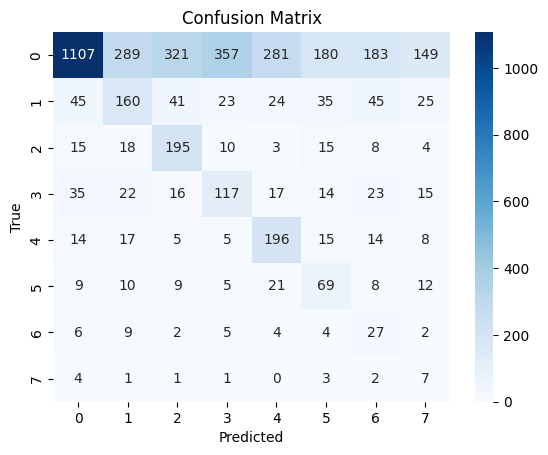

In [ ]:
# Confusion Matrix
conf_matrix = metrics.confusion_matrix(y, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
submission1 = pd.DataFrame({
    'IDText': id,
    'Kelas': test_predictions
})

submission1['Kelas'] = submission1['Kelas'].map(encoding_dict)

submission1.to_csv('submission18.csv', index=False)

In [ ]:
submission1['Kelas'].value_counts()

Kelas
Politik                    282
Ekonomi                    187
Pertahanan dan Keamanan    180
Ideologi                   140
Sumber Daya Alam            63
Sosial Budaya               61
Demografi                   58
Geografi                    29
Name: count, dtype: int64

## RandomSampler

In [ ]:
tuning_parameter = {'max_df': 0.9221791266700505, 'min_df': 3, 'ngram_range': (1, 2), 'alpha': 9.4039784775262, 'fit_prior': False}

In [ ]:
best_clf = Pipeline([
    ('vectorizer_tfid', TfidfVectorizer()),
    ('ros', RandomOverSampler(random_state=42)),
    ('Complement NB', ComplementNB())
])

In [ ]:
# Update the keys to match the pipeline structure
updated_best_params = {
    'vectorizer_tfid__max_df': tuning_parameter['max_df'],
    'vectorizer_tfid__min_df': tuning_parameter['min_df'],
    'vectorizer_tfid__ngram_range': tuning_parameter['ngram_range'],
    'Complement NB__alpha': tuning_parameter['alpha'],
    'Complement NB__fit_prior': tuning_parameter['fit_prior']
}

best_clf.set_params(**updated_best_params)

Pipeline(steps=[('vectorizer_tfid',
                 TfidfVectorizer(max_df=0.9221791266700505, min_df=3,
                                 ngram_range=(1, 2))),
                ('ros', RandomOverSampler(random_state=42)),
                ('Complement NB',
                 ComplementNB(alpha=9.4039784775262, fit_prior=False))])

In [ ]:
test_features = pd.read_csv('/content/clean_test.csv')
id = test_features['id']
test_features.drop(columns=['Unnamed: 0', 'text', ], inplace=True)
test_features

,id,stemmed_text
0,TXT0001,kamu orang pro demokrasi negara sempat ngelawa...
1,TXT0002,prabowo hutang negeri hutang negeri indonesia ...
2,TXT0003,ganjar pranowo beliau sosok mengagunhkan nilai...
3,TXT0004,kumpar prabowo gibran sejahtera rakyat
4,TXT0005,ainunnajib nyambung junjung elu aomkmkmkmk bic...
...,...,...
995,TXT0996,bikin bangga deh ganjar mahfud alokasi belanja...
996,TXT0997,jokowi pilpres 2024 besar hati rangkul prabowo...
997,TXT0998,sbaiknya si got nga ikut debat dehnga mau apak...
998,TXT0999,biasa rembuk musyawarah gaya pimpin ganjar gub...


In [ ]:
X = process_df.stemmed_text
y = process_df.encoded_label

best_clf.fit(X, y)

# predict test dan bikin csv-nya
test_predictions = best_clf.predict(test_features['stemmed_text'])

In [ ]:
encoding_dict = {
    0:'Politik',
    1:'Sosial Budaya',
    2:'Pertahanan dan Keamanan',
    3:'Ideologi',
    4:'Ekonomi',
    5:'Sumber Daya Alam',
    6:'Demografi',
    7:'Geografi',
}

In [ ]:
pd.Series(test_predictions).value_counts()

2    184
0    183
3    168
4    166
5    121
1     69
6     64
7     45
Name: count, dtype: int64

In [ ]:
y_pred = cross_val_predict(best_clf, X, y, cv=5)
print("Classification Report:")
print(classification_report(y, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.25      0.40      2867
           1       0.31      0.39      0.35       398
           2       0.34      0.78      0.47       268
           3       0.22      0.47      0.30       259
           4       0.34      0.74      0.46       274
           5       0.19      0.48      0.27       143
           6       0.06      0.46      0.10        59
           7       0.02      0.37      0.03        19

    accuracy                           0.35      4287
   macro avg       0.30      0.49      0.30      4287
weighted avg       0.71      0.35      0.38      4287



In [ ]:
balanced_acc = metrics.balanced_accuracy_score(y, y_pred)
print("Balanced Accuracy:", balanced_acc)

Balanced Accuracy: 0.49120388663235204


In [ ]:
submission1 = pd.DataFrame({
    'IDText': id,
    'Kelas': test_predictions
})

submission1['Kelas'] = submission1['Kelas'].map(encoding_dict)

submission1.to_csv('submission12.csv', index=False)

In [ ]:
submission1['Kelas'].value_counts()

Kelas
Pertahanan dan Keamanan    184
Politik                    183
Ideologi                   168
Ekonomi                    166
Sumber Daya Alam           121
Sosial Budaya               69
Demografi                   64
Geografi                    45
Name: count, dtype: int64

## SMOTE Base

In [ ]:
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline

In [ ]:
tuning_parameter = {'max_df': 0.8981026022043065, 'min_df': 2, 'ngram_range': (1, 2), 'alpha': 7.09904501602026, 'fit_prior': False}

In [ ]:
best_clf = ImbPipeline([
        ('vectorizer_tfid', TfidfVectorizer()),
        ('smote', SMOTE(random_state=42)),
        ('Complement NB', ComplementNB())
    ])

In [ ]:
updated_best_params = {
    'vectorizer_tfid__max_df': tuning_parameter['max_df'],
    'vectorizer_tfid__min_df': tuning_parameter['min_df'],
    'vectorizer_tfid__ngram_range': tuning_parameter['ngram_range'],
    'Complement NB__alpha': tuning_parameter['alpha'],
    'Complement NB__fit_prior': tuning_parameter['fit_prior']
}

best_clf.set_params(**updated_best_params)

Pipeline(steps=[('vectorizer_tfid',
                 TfidfVectorizer(max_df=0.8981026022043065, min_df=2,
                                 ngram_range=(1, 2))),
                ('smote', SMOTE(random_state=42)),
                ('Complement NB',
                 ComplementNB(alpha=7.09904501602026, fit_prior=False))])

In [ ]:
# new_test = pd.read_csv('/content/cleaned_test_unlabel_without_happy_final.csv')

In [ ]:
test_features = pd.read_csv('/content/wing_it.csv')
id = test_features['id']
# test_features.drop(columns=['Unnamed: 0', 'text', ], inplace=True)
test_features

,id,stemmed_text
0,TXT0001,kamu orang pro demokrasi negara sempat ngelawa...
1,TXT0002,prabowo hutang negeri hutang negeri indonesia ...
2,TXT0003,ganjar pranowo beliau sosok mengagunhkan nilai...
3,TXT0004,kumpar prabowo gibran sejahtera rakyat
4,TXT0005,nyambung junjung elu bicara etika kata anies o...
...,...,...
995,TXT0996,bikin bangga deh ganjar mahfud alokasi belanja...
996,TXT0997,jokowi pilpres 2024 besar hati rangkul prabowo...
997,TXT0998,sebaiknya si got nga ikut debat dehnga mau apa...
998,TXT0999,biasa rembuk musyawarah gaya pimpin ganjar gub...


In [ ]:
X = process_df.stemmed_text
y = process_df.encoded_label

best_clf.fit(X, y)

# predict test dan bikin csv-nya
test_predictions = best_clf.predict(test_features['stemmed_text'])

In [ ]:
encoding_dict = {
    0:'Politik',
    1:'Sosial Budaya',
    2:'Pertahanan dan Keamanan',
    3:'Ideologi',
    4:'Ekonomi',
    5:'Sumber Daya Alam',
    6:'Demografi',
    7:'Geografi',
}

In [ ]:
pd.Series(test_predictions).value_counts()

4    198
3    195
0    181
2    179
5     71
1     68
6     67
7     41
Name: count, dtype: int64

In [ ]:
y_pred = cross_val_predict(best_clf, X, y, cv=5)
print("Classification Report:")
print(classification_report(y, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.25      0.40      2867
           1       0.32      0.43      0.37       398
           2       0.33      0.78      0.47       268
           3       0.21      0.48      0.29       259
           4       0.35      0.73      0.47       274
           5       0.20      0.52      0.29       143
           6       0.07      0.47      0.12        59
           7       0.02      0.47      0.04        19

    accuracy                           0.36      4287
   macro avg       0.30      0.52      0.31      4287
weighted avg       0.71      0.36      0.39      4287



In [ ]:
balanced_acc = metrics.balanced_accuracy_score(y, y_pred)
print("Balanced Accuracy:", balanced_acc)

Balanced Accuracy: 0.518581152041444


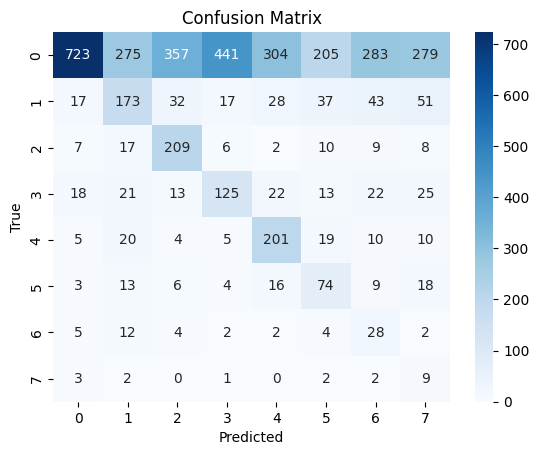

In [ ]:
# Confusion Matrix
conf_matrix = metrics.confusion_matrix(y, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
submission1 = pd.DataFrame({
    'IDText': id,
    'Kelas': test_predictions
})

submission1['Kelas'] = submission1['Kelas'].map(encoding_dict)

submission1.to_csv('submission30.csv', index=False)

In [ ]:
submission1['Kelas'].value_counts()

Kelas
Ekonomi                    198
Ideologi                   195
Politik                    181
Pertahanan dan Keamanan    179
Sumber Daya Alam            71
Sosial Budaya               68
Demografi                   67
Geografi                    41
Name: count, dtype: int64

## ADAYSN

In [ ]:
tuning_parameter = {'max_df': 0.9889048937238344, 'min_df': 5, 'ngram_range': (1, 2), 'alpha': 2.023002218208899, 'fit_prior': True, 'n_neighbors': 10, 'sampling_strategy': 'not majority'}

In [ ]:
best_clf = Pipeline([
    ('vectorizer_tfid', TfidfVectorizer()),
    ('adasyn', ADASYN(random_state=42)),
    ('Complement NB', ComplementNB())
])

In [ ]:
# Update the keys to match the pipeline structure
updated_best_params = {
    'vectorizer_tfid__max_df': tuning_parameter['max_df'],
    'vectorizer_tfid__min_df': tuning_parameter['min_df'],
    'vectorizer_tfid__ngram_range': tuning_parameter['ngram_range'],
    'Complement NB__alpha': tuning_parameter['alpha'],
    'Complement NB__fit_prior': tuning_parameter['fit_prior'],
    'adasyn__n_neighbors': tuning_parameter['n_neighbors'],
    'adasyn__sampling_strategy': tuning_parameter['sampling_strategy']
}

best_clf.set_params(**updated_best_params)

Pipeline(steps=[('vectorizer_tfid',
                 TfidfVectorizer(max_df=0.9889048937238344, min_df=5,
                                 ngram_range=(1, 2))),
                ('adasyn',
                 ADASYN(n_neighbors=10, random_state=42,
                        sampling_strategy='not majority')),
                ('Complement NB', ComplementNB(alpha=2.023002218208899))])

In [ ]:
test_features = pd.read_csv('/content/cleaned_test_try.csv')
id = test_features['id']
# test_features.drop(columns=['Unnamed: 0', 'text', ], inplace=True)
test_features

,id,stemmed_text
0,TXT0001,kamu orang pro demokrasi negara sempat ngelawa...
1,TXT0002,prabowo hutang negeri hutang negeri indonesia ...
2,TXT0003,ganjar pranowo beliau sosok mengagunhkan nilai...
3,TXT0004,kumpar prabowo gibran sejahtera rakyat
4,TXT0005,nyambung junjung elu bicara etika kata anies o...
...,...,...
995,TXT0996,bikin bangga deh ganjar mahfud alokasi belanja...
996,TXT0997,jokowi pilpres 2024 besar hati rangkul prabowo...
997,TXT0998,sebaiknya si got nga ikut debat dehnga mau apa...
998,TXT0999,biasa rembuk musyawarah gaya pimpin ganjar gub...


In [ ]:
X = process_df.stemmed_text
y = process_df.encoded_label

best_clf.fit(X, y)

# predict test dan bikin csv-nya
test_predictions = best_clf.predict(test_features['stemmed_text'])

In [ ]:
encoding_dict = {
    0:'Politik',
    1:'Sosial Budaya',
    2:'Pertahanan dan Keamanan',
    3:'Ideologi',
    4:'Ekonomi',
    5:'Sumber Daya Alam',
    6:'Demografi',
    7:'Geografi',
}

In [ ]:
pd.Series(test_predictions).value_counts()

0    229
4    206
2    198
3    133
1     71
5     67
6     63
7     33
Name: count, dtype: int64

In [ ]:
y_pred = cross_val_predict(best_clf, X, y, cv=5)
print("Classification Report:")
print(classification_report(y, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.31      0.46      2867
           1       0.29      0.37      0.33       398
           2       0.32      0.77      0.45       268
           3       0.22      0.49      0.31       259
           4       0.36      0.72      0.48       274
           5       0.20      0.48      0.28       143
           6       0.06      0.37      0.10        59
           7       0.02      0.42      0.05        19

    accuracy                           0.39      4287
   macro avg       0.30      0.49      0.31      4287
weighted avg       0.70      0.39      0.43      4287



In [ ]:
balanced_acc = metrics.balanced_accuracy_score(y, y_pred)
print("Balanced Accuracy:", balanced_acc)

Balanced Accuracy: 0.49222898758396777


In [ ]:
submission1 = pd.DataFrame({
    'IDText': id,
    'Kelas': test_predictions
})

submission1['Kelas'] = submission1['Kelas'].map(encoding_dict)

submission1.to_csv('submission21.csv', index=False)

In [ ]:
submission1['Kelas'].value_counts()

Kelas
Politik                    229
Ekonomi                    206
Pertahanan dan Keamanan    198
Ideologi                   133
Sosial Budaya               71
Sumber Daya Alam            67
Demografi                   63
Geografi                    33
Name: count, dtype: int64